In [1]:
# Importing the Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import datetime as dt
import warnings
import math
import random
import itertools

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedBaggingClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
# Making the Necessary Adjustments
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 700)
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=Warning)

In [4]:
df_ = pd.read_csv("C:/Users/omshi/OneDrive/Documents/Data Analytics/Python/Project/train.csv")
df = df_.copy()
df.head()

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
0           Mobile            36.758104  ...                        10   
1           Tablet            32.450568  ...                        18   
2         Computer             7.395160  ...                        23   
3           Tablet            27.960389  ...                        30   
4               TV            20.083397  ...                        20   

   GenrePreference UserRating  SupportTicketsPerMonth  Gender WatchlistSize  \
0           Sci-Fi   2.176498                       4    Male             3   
1           Action   3.478632                       8    Male            23   
2          Fantasy   4.238824                       6    Male             1   
3            Drama   4.276013                       2    Male            24   
4           Comedy   3.616170                       4  Female             0   

   ParentalControl SubtitlesEnabled  CustomerID Churn  
0               No               No  CB6SXPNVZA     0  
1               No              Yes  S7R2G87O09     0  
2              Yes              Yes  EASDC20BDT     0  
3              Yes              Yes  NPF69NT69N     0  
4               No               No  4LGYPK7VOL     0  

[5 rows x 21 columns]

In [5]:
# Analysis of Data Set
def show_info(dataframe):
    print("***** NAN *****")
    print(dataframe.isnull().sum())
    print("***** Duplicated *****")
    print(dataframe.duplicated().sum())
    print("***** NUNIQUE *****")
    print(dataframe.nunique())
    print("***** INFO *****")
    print(dataframe.info())
    print("***** COLUMNS *****")
    print(dataframe.columns)
    print("***** DESCRIPTIVE STATISTICS *****")
    print(dataframe.describe().T)

print(show_info(df))

***** NAN *****
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64
***** Duplicated *****
0
***** NUNIQUE *****
AccountAge                     119
MonthlyCharges              243787
TotalCharges                243787
SubscriptionType                 3
PaymentMethod                    4
PaperlessBilling                 2
ContentType                      3
MultiDeviceAccess                2
DeviceRegistered

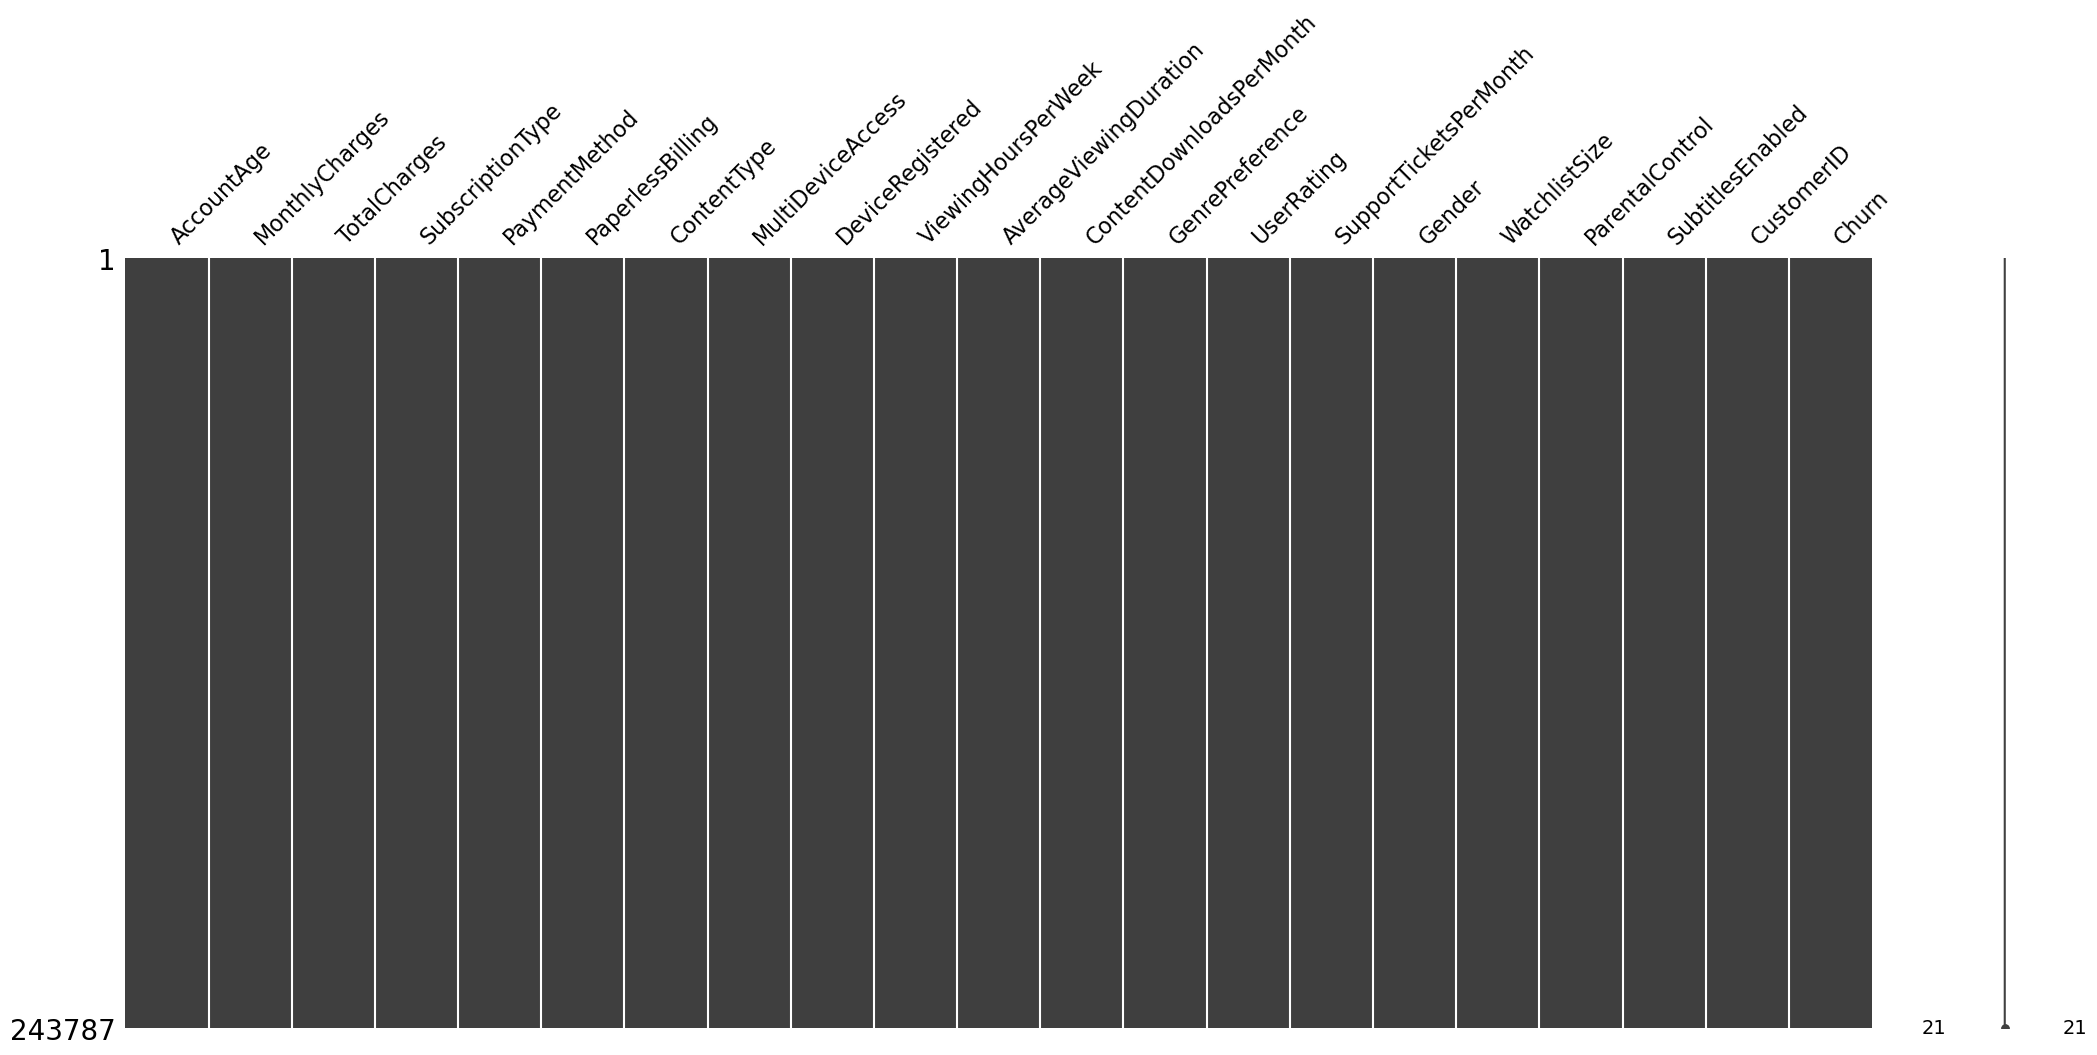

In [8]:
# Analysis of Missing Number 
import missingno as msn
msn.matrix(df)
plt.show()

In [9]:
# Grab Variables
def grab_variable(dataframe, num_th=10, car_th=20, var_name=False):
    
    # Categoric Variables #
    
    cat_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["object", "category", "bool"]]
    
    num_but_cat = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
                   and dataframe[i].nunique() <= num_th]
    
    cat_but_car = [i for i in dataframe.columns if dataframe[i].dtypes in ["category", "object"]
                   and dataframe[i].nunique() > car_th]
    
    cat_var = cat_var + num_but_cat
    cat_var = [i for i in cat_var if i not in cat_but_car]

    # Numeric Variables #
    num_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
               and dataframe[i].nunique() > num_th]

    print("Observation:", len(dataframe))
    print("Number of Variables:", len(dataframe.columns))
    print("Number of Categoric Variables:", len(cat_var))
    print("Number of Num but Cat Variables:", len(num_but_cat))
    print("Number of Cat but Cardinal Variables:", len(cat_but_car))
    print("Number of Numeric Variables:", len(num_var))

    if var_name:
        print("Categoric Variables:", cat_var)
        print("Numeric But Categoric Variables:", num_but_cat)
        print("Categoric But Cardinal Variables:", cat_but_car)
        print("Numeric Variables:", num_var)
    return cat_var, cat_but_car, num_var

cat_var, cat_but_car, num_var = grab_variable(df)

Observation: 243787
Number of Variables: 21
Number of Categoric Variables: 12
Number of Num but Cat Variables: 2
Number of Cat but Cardinal Variables: 1
Number of Numeric Variables: 8


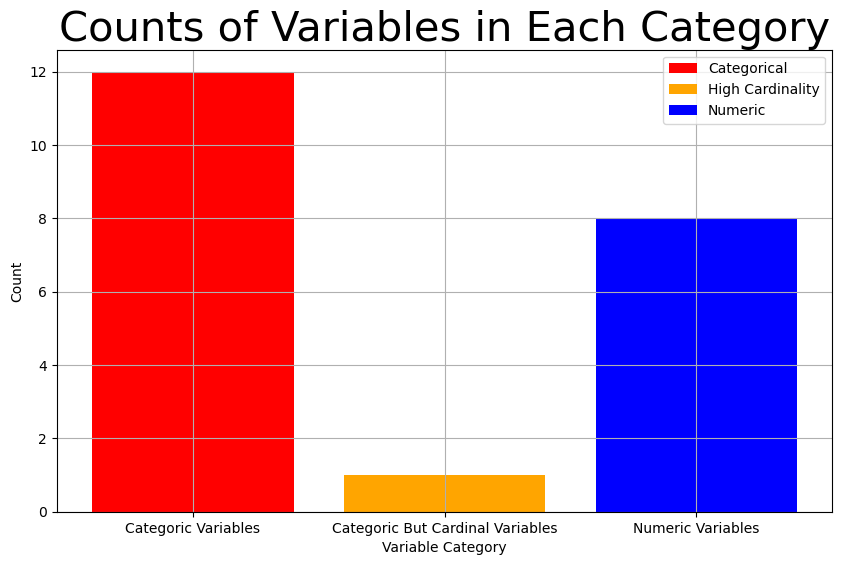

In [10]:
def plot_variable_counts(cat_var, cat_but_car, num_var):
    # Count the number of variables in each category
    category_counts = [len(cat_var), len(cat_but_car), len(num_var)]
    categories = ['Categoric Variables', 'Categoric But Cardinal Variables', 'Numeric Variables']

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, category_counts, color=['red', 'orange', 'blue'])
    plt.title('Counts of Variables in Each Category', fontsize=30)
    plt.xlabel('Variable Category')
    plt.ylabel('Count')
    plt.grid()
    legend_labels = ['Categorical', 'High Cardinality', 'Numeric']
    plt.legend(bars, legend_labels, loc="upper right")
    plt.show()

plot_variable_counts(cat_var, cat_but_car, num_var)

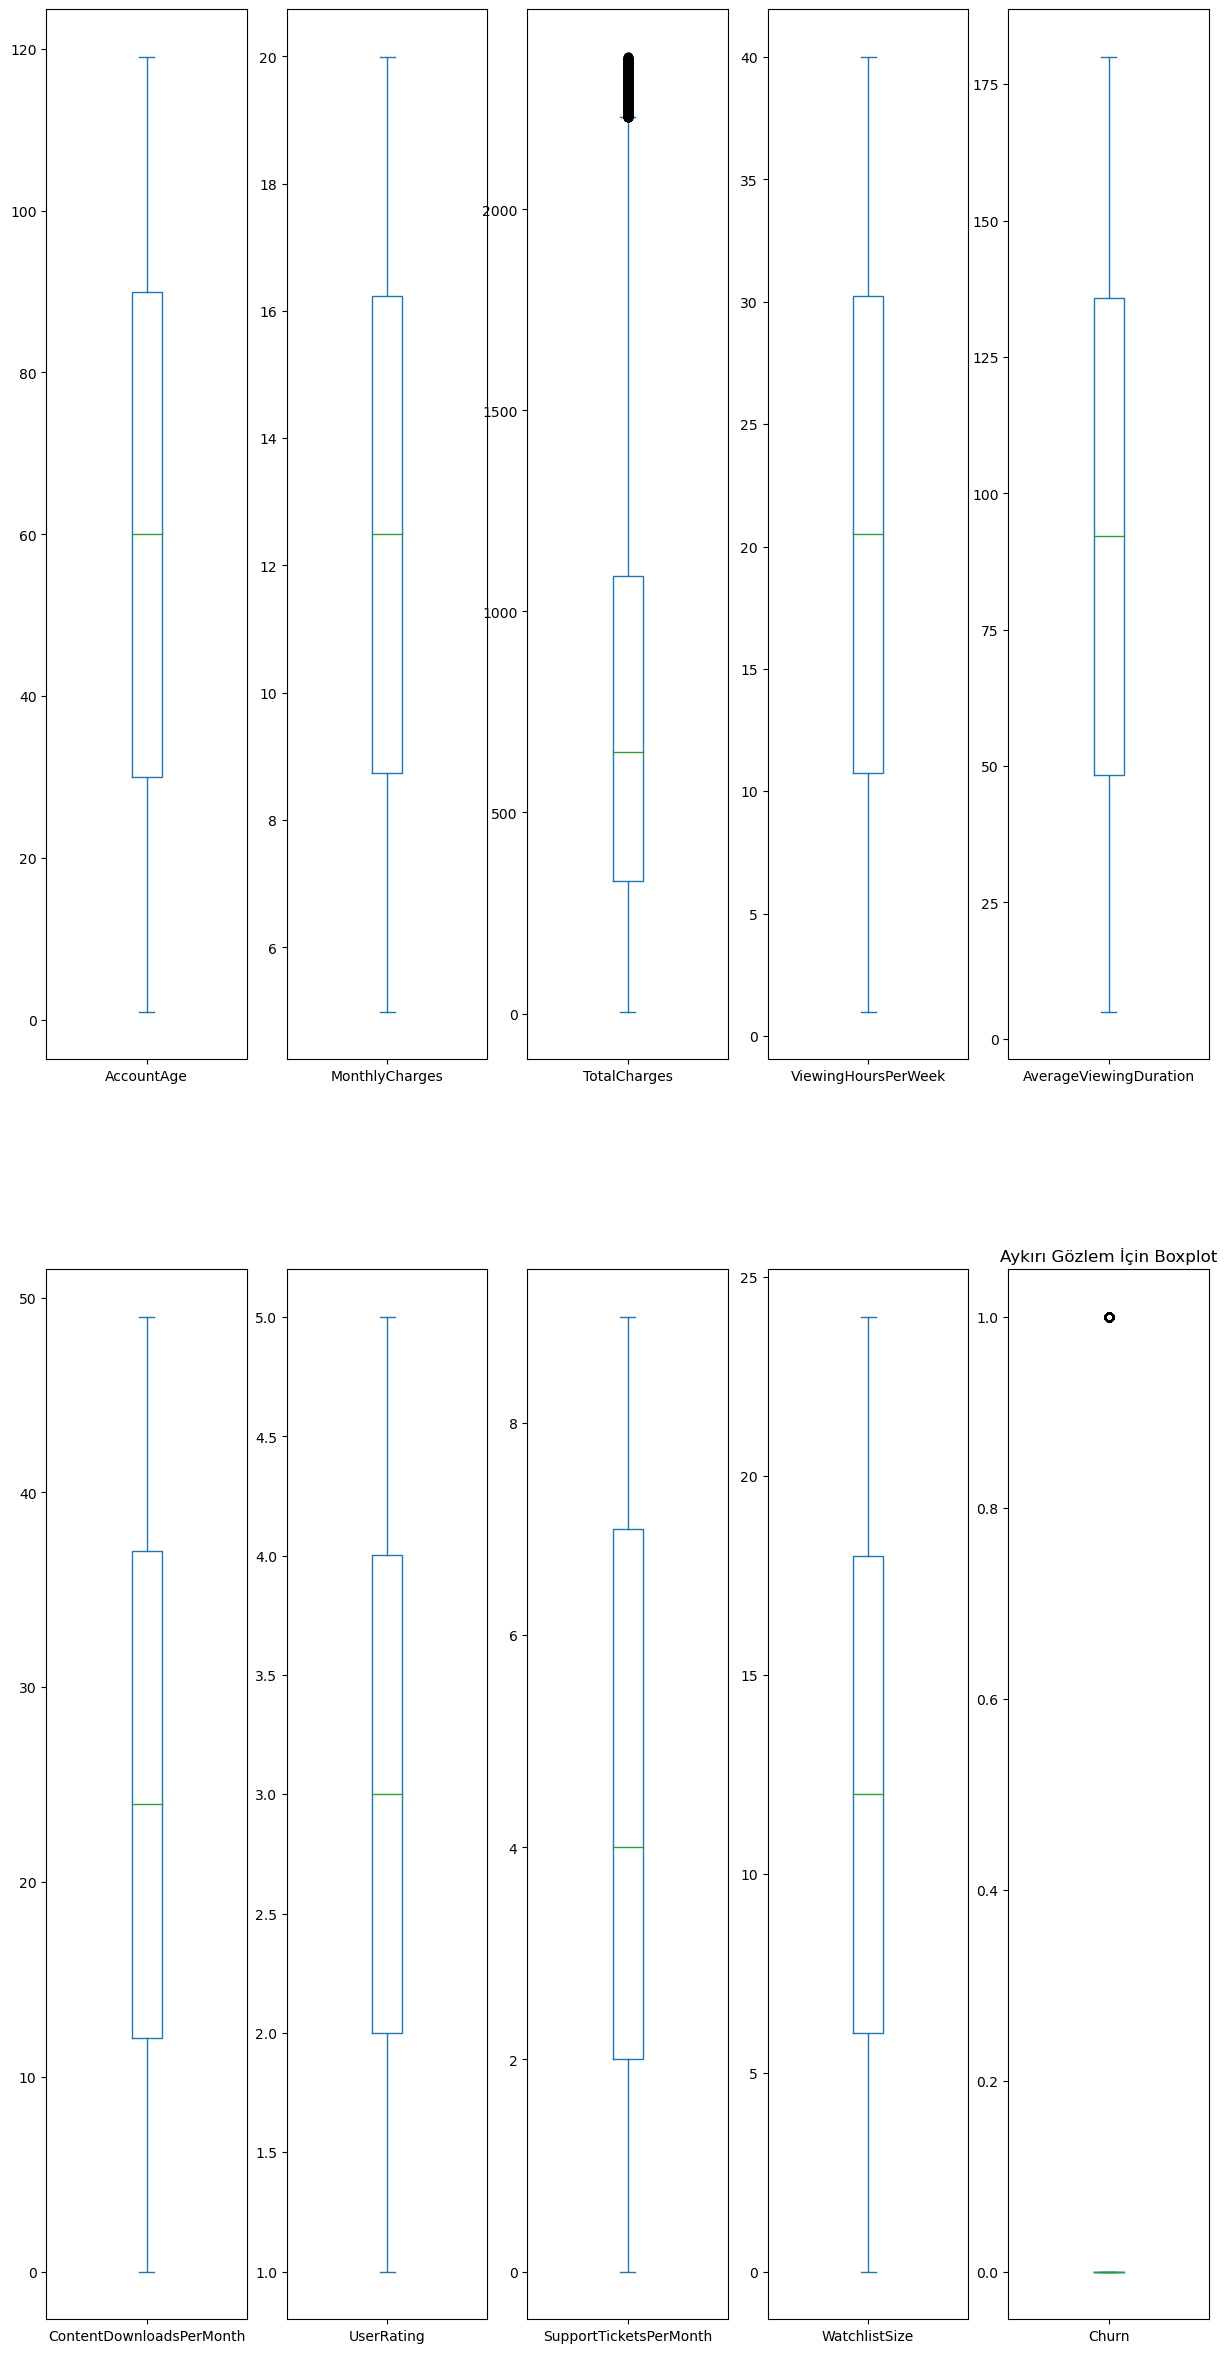

In [11]:
# Analysis of Oultiers
df.plot(kind="box", subplots=True, figsize=(15, 30), layout=(2, 5))
plt.title("Aykırı Gözlem İçin Boxplot")
plt.show()

In [12]:
# Finding Thresholds (Limits)
def outlier_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    q1 = dataframe[variable].quantile(q1)
    q3 = dataframe[variable].quantile(q3)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

for i in num_var:
    print(i, ":", outlier_thresholds(df, i))

AccountAge : (-60.0, 180.0)
MonthlyCharges : (-2.5108822537315287, 27.487585566502734)
TotalCharges : (-811.1084761822483, 2229.5728643148022)
ViewingHoursPerWeek : (-18.419212297484723, 59.40256110709355)
AverageViewingDuration : (-82.90608528289064, 267.1965276075546)
ContentDownloadsPerMonth : (-25.5, 74.5)
UserRating : (-1.0011033867446884, 7.004113639054296)
WatchlistSize : (-12.0, 36.0)


In [13]:
def check_outlier(dataframe, variable):
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)].shape[0] > 0:
        print(variable, "-->", len(dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)]))
        return True
    else:
        return False
        
for i in num_var:
    print(i, ":", check_outlier(df, i))

AccountAge : False
MonthlyCharges : False
TotalCharges --> 741
TotalCharges : True
ViewingHoursPerWeek : False
AverageViewingDuration : False
ContentDownloadsPerMonth : False
UserRating : False
WatchlistSize : False


In [14]:
def suppress_outliers(dataframe, variable):
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[dataframe[variable] < lower_limit, variable] = lower_limit
    dataframe.loc[dataframe[variable] > upper_limit, variable] = upper_limit

for i in num_var:
    if check_outlier(df, i) == True:
        suppress_outliers(df, i)
        print("Suppressed Outliers for " + i)
    else:
        continue

TotalCharges --> 741
Suppressed Outliers for TotalCharges


In [15]:
for i in num_var:
    print(i, ":", check_outlier(df, i))

AccountAge : False
MonthlyCharges : False
TotalCharges : False
ViewingHoursPerWeek : False
AverageViewingDuration : False
ContentDownloadsPerMonth : False
UserRating : False
WatchlistSize : False


[-1.32226751 -1.31225155 -1.28506761 -1.28441301 -1.25861219 -1.25741131]


<Figure size 1400x1000 with 0 Axes>

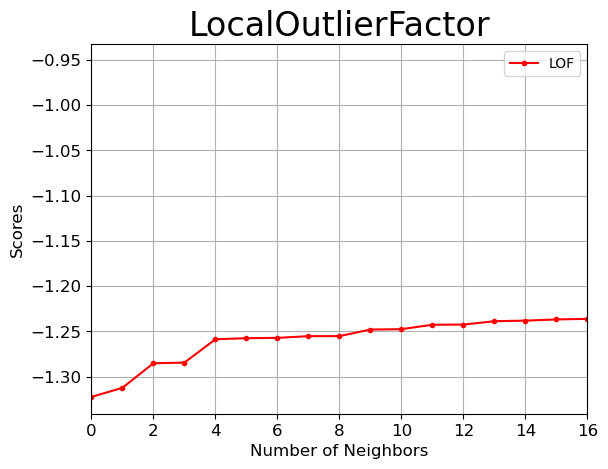

In [16]:
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit_predict(df[num_var])

df_scores = lof.negative_outlier_factor_
print(np.sort(df_scores)[0:6])

scores = pd.DataFrame(np.sort(df_scores))
plt.figure(figsize=(14, 10))
scores.plot(stacked=True, xlim=[0, 16], style=".-", color="red")
plt.title("LocalOutlierFactor", fontsize=24)
plt.xlabel("Number of Neighbors", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(["LOF"])
plt.show()

In [17]:
th = np.sort(df_scores)[3]
th

-1.2844130071114388

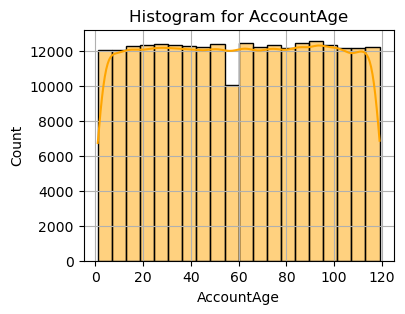

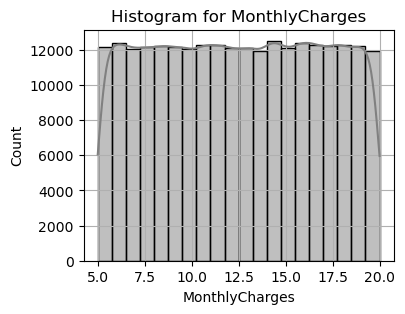

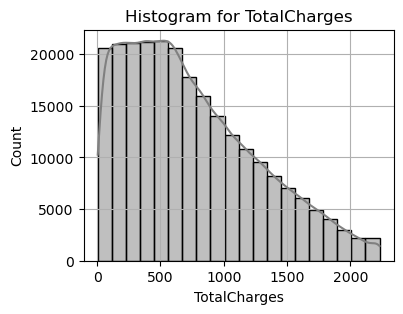

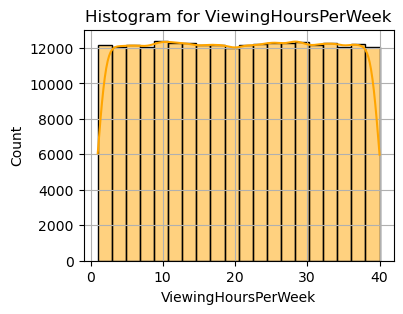

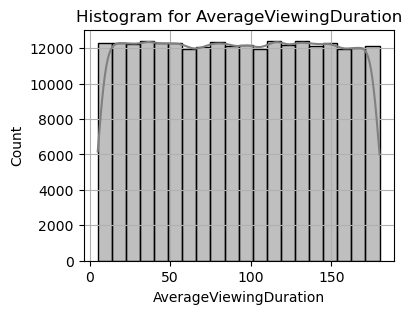

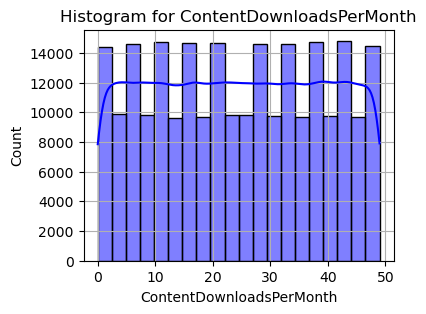

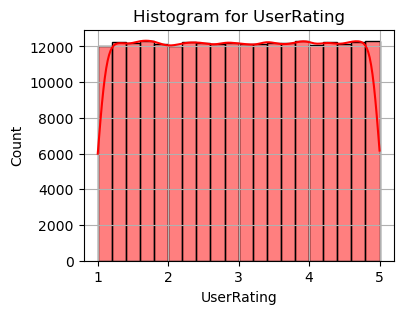

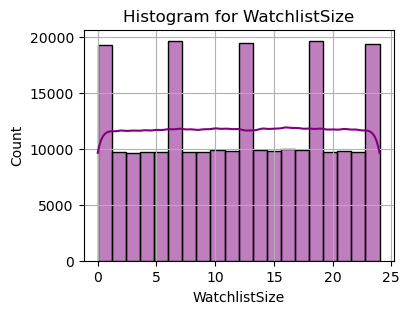

In [18]:
# Analysis of Numeric Variables:
def num_var_anal(dataframe, num_cols):
    
    for i in num_cols:
        plt.figure(figsize=(4, 3))
        sns.histplot(data=dataframe, 
                     x=i, bins=20,
                     color=random.choice(["green", "blue", "red", "gray",
                                          "orange", "pink", "purple"]),
                     kde=True)
        plt.title("Histogram for " + i)
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid()
        plt.show()

num_var_anal(df, num_var)

In [19]:
import scipy.stats as stats
skewness = df[num_var].skew()
kurtosis = df[num_var].kurtosis()
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)

Skewness:
 AccountAge                 -0.002506
MonthlyCharges             -0.003584
TotalCharges                0.688936
ViewingHoursPerWeek        -0.001340
AverageViewingDuration      0.002758
ContentDownloadsPerMonth   -0.000427
UserRating                 -0.000958
WatchlistSize              -0.004500
dtype: float64
Kurtosis:
 AccountAge                 -1.199282
MonthlyCharges             -1.201509
TotalCharges               -0.282112
ViewingHoursPerWeek        -1.199817
AverageViewingDuration     -1.200900
ContentDownloadsPerMonth   -1.201353
UserRating                 -1.201812
WatchlistSize              -1.199512
dtype: float64


***********************************************************
                  SubscriptionType      Ratio
SubscriptionType                             
Standard                     81920  33.603104
Basic                        81050  33.246235
Premium                      80817  33.150660


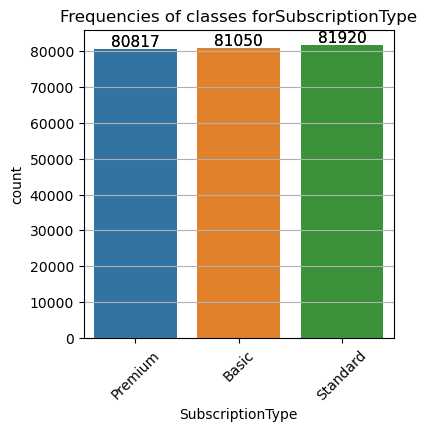

***********************************************************
                  PaymentMethod      Ratio
PaymentMethod                             
Electronic check          61313  25.150234
Credit card               60924  24.990668
Bank transfer             60797  24.938573
Mailed check              60753  24.920525


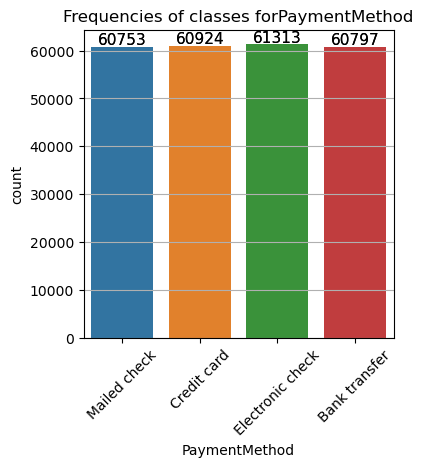

***********************************************************
                  PaperlessBilling      Ratio
PaperlessBilling                             
No                          121980  50.035482
Yes                         121807  49.964518


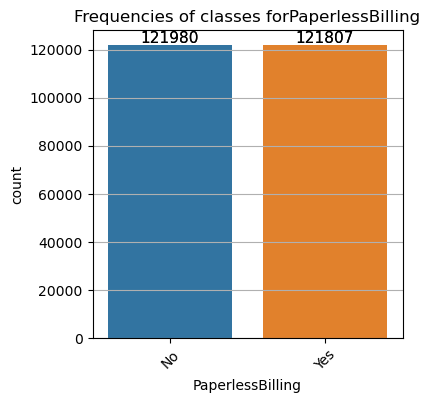

***********************************************************
             ContentType      Ratio
ContentType                        
Both               81737  33.528039
TV Shows           81145  33.285204
Movies             80905  33.186757


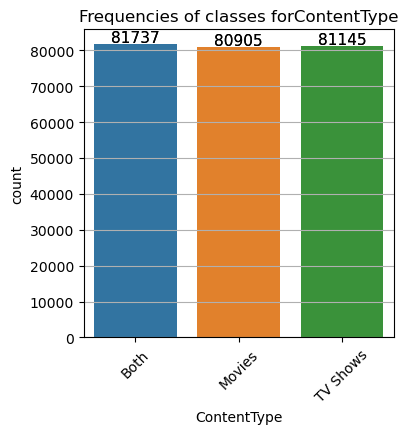

***********************************************************
                   MultiDeviceAccess      Ratio
MultiDeviceAccess                              
No                            122035  50.058042
Yes                           121752  49.941958


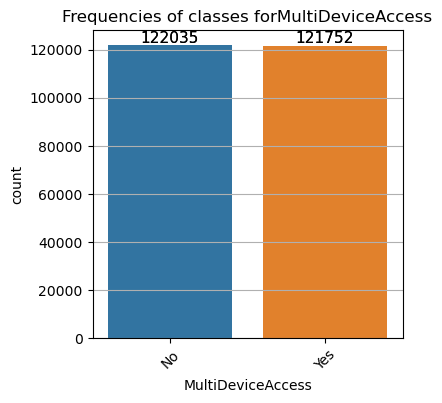

***********************************************************
                  DeviceRegistered      Ratio
DeviceRegistered                             
Computer                     61147  25.082141
Tablet                       61143  25.080501
Mobile                       60914  24.986566
TV                           60583  24.850792


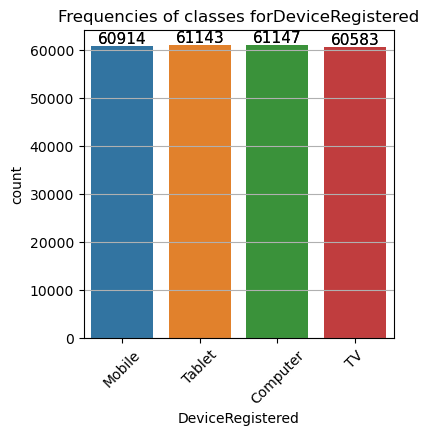

***********************************************************
                 GenrePreference      Ratio
GenrePreference                            
Comedy                     49060  20.124125
Fantasy                    48955  20.081054
Drama                      48744  19.994503
Action                     48690  19.972353
Sci-Fi                     48338  19.827965


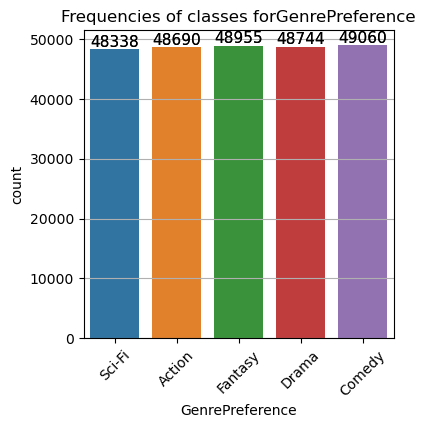

***********************************************************
        Gender      Ratio
Gender                   
Female  121930  50.014972
Male    121857  49.985028


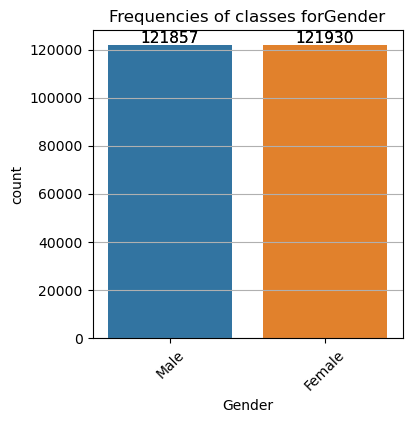

***********************************************************
                 ParentalControl      Ratio
ParentalControl                            
Yes                       122085  50.078552
No                        121702  49.921448


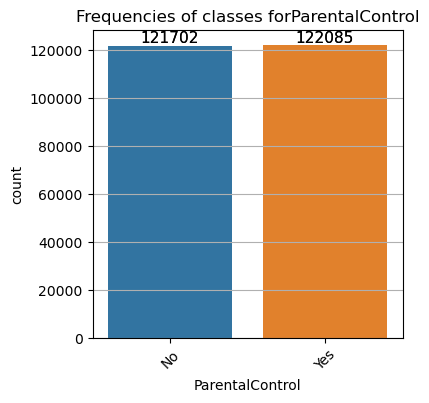

***********************************************************
                  SubtitlesEnabled      Ratio
SubtitlesEnabled                             
Yes                         122180  50.117521
No                          121607  49.882479


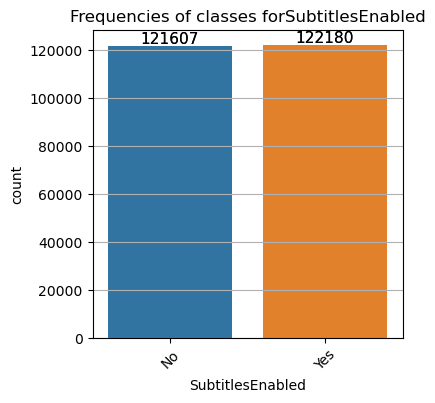

***********************************************************
                        SupportTicketsPerMonth      Ratio
SupportTicketsPerMonth                                   
7                                        24626  10.101441
4                                        24618  10.098159
2                                        24477  10.040322
9                                        24435  10.023094
8                                        24400  10.008737
3                                        24360   9.992329
6                                        24296   9.966077
0                                        24292   9.964436
1                                        24283   9.960744
5                                        24000   9.844659


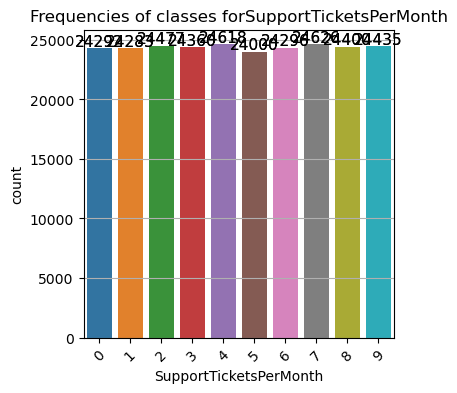

***********************************************************
        Churn      Ratio
Churn                   
0      199605  81.876802
1       44182  18.123198


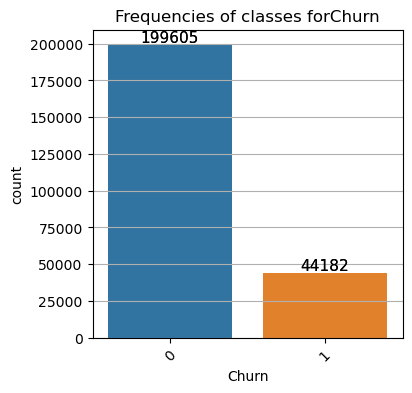

In [20]:
# Analysis of Categoric Variables

def cat_var_anal(dataframe, cat_cols, plot=False):
    for i in cat_cols:
        print("***********************************************************")
        print(pd.DataFrame({i: dataframe[i].value_counts(),
                            "Ratio": dataframe[i].value_counts() * 100 / len(dataframe)}))

        if plot:

            plt.figure(figsize=(4, 4))
            sns.countplot(data=dataframe, x=i)
            plt.title("Frequencies of classes for" + i)
            plt.xlabel(i)
            plt.ylabel("Frequency")
            plt.xticks(fontsize=10, rotation=45)
            plt.yticks(fontsize=10)
            plt.grid()

            ax = sns.countplot(data=dataframe, x=i)
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=11,
                            color='black', xytext=(0, 5),
                            textcoords='offset points')

            plt.show(block=True)

cat_var_anal(df, cat_var, plot=True)

                          AccountAge  MonthlyCharges  TotalCharges  \
AccountAge                  1.000000        0.001706      0.820367   
MonthlyCharges              0.001706        1.000000      0.498142   
TotalCharges                0.820367        0.498142      1.000000   
ViewingHoursPerWeek        -0.001640       -0.003029     -0.003004   
AverageViewingDuration      0.000191       -0.000604      0.000848   
ContentDownloadsPerMonth    0.001220       -0.000127      0.000205   
UserRating                  0.000440        0.000056      0.000596   
WatchlistSize              -0.002640       -0.000540     -0.001778   

                          ViewingHoursPerWeek  AverageViewingDuration  \
AccountAge                          -0.001640                0.000191   
MonthlyCharges                      -0.003029               -0.000604   
TotalCharges                        -0.003004                0.000848   
ViewingHoursPerWeek                  1.000000                0.000949   
Aver

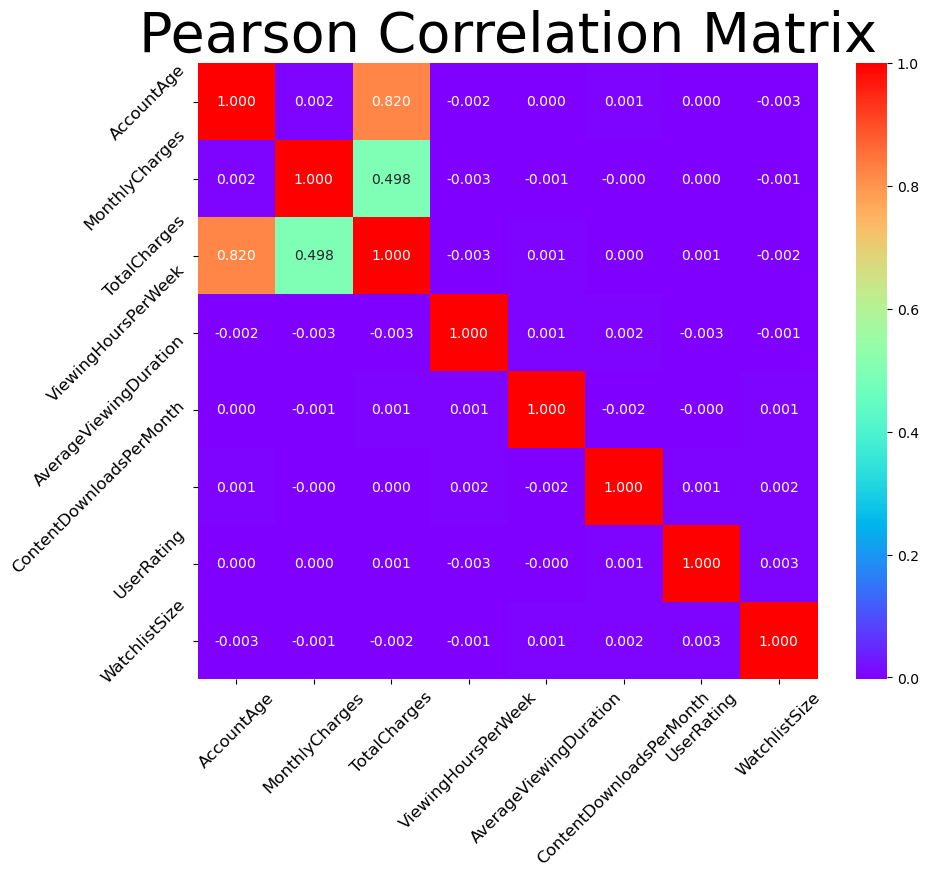

None


In [21]:
# Pearson Correlation Analysis for Numeric Variables
def pearson_corr(dataframe, num_cols, plot=False):

    print(df[num_cols].corr())

    if plot:
        plt.figure(figsize=[10, 8])
        sns.heatmap(data=dataframe[num_cols].corr(), annot=True, fmt=".3f",
                    linecolor="pink", cmap="rainbow")
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(rotation=45, fontsize=12)
        plt.title("Pearson Correlation Matrix", fontsize=40)
        print(plt.show())

pearson_corr(df, num_var, plot=True)

******************
Churn & AccountAge--> -0.19773563199742913
******************
Churn & MonthlyCharges--> 0.10047280662870758
******************
Churn & TotalCharges--> -0.12057564405008007
******************
Churn & ViewingHoursPerWeek--> -0.1286448060396568
******************
Churn & AverageViewingDuration--> -0.14689656866692888
******************
Churn & ContentDownloadsPerMonth--> -0.12975187419257542
******************
Churn & UserRating--> 0.022123581084271215
******************
Churn & WatchlistSize--> 0.02173867491703151


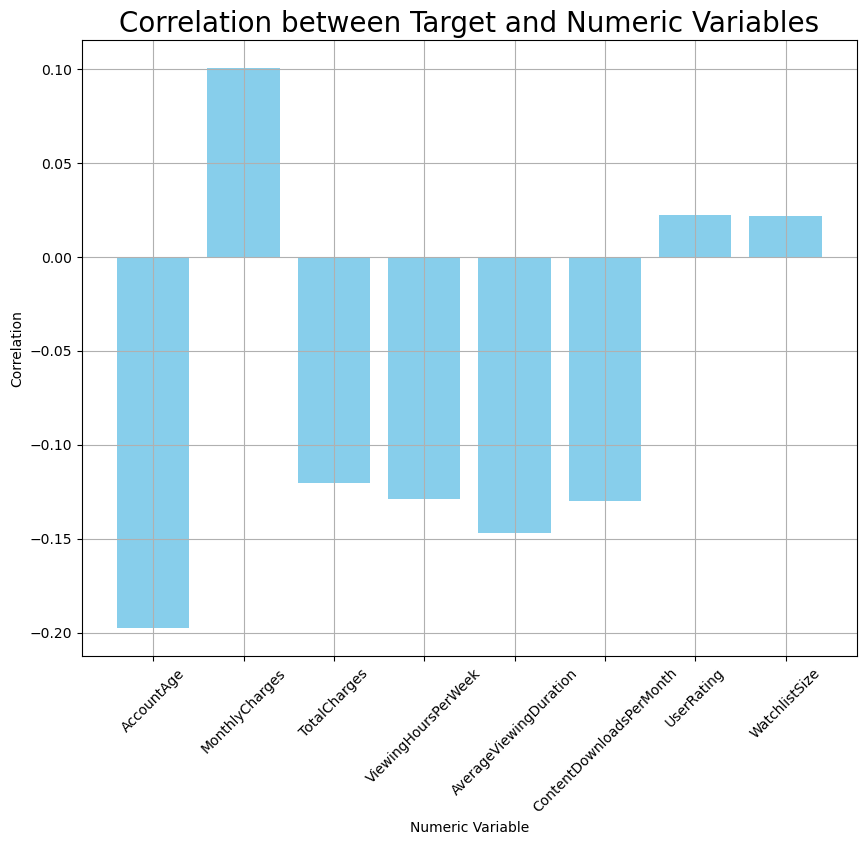

In [22]:
# Analysis of correlation between the Target and Numeric Variables
for i in num_var:
    print("******************")
    print("Churn & " + i + "-->", df["Churn"].corr(df[i]))

correlations = {i: df["Churn"].corr(df[i]) for i in num_var}

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.title('Correlation between Target and Numeric Variables', fontsize=20)
plt.xlabel('Numeric Variable')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid()
plt.show()

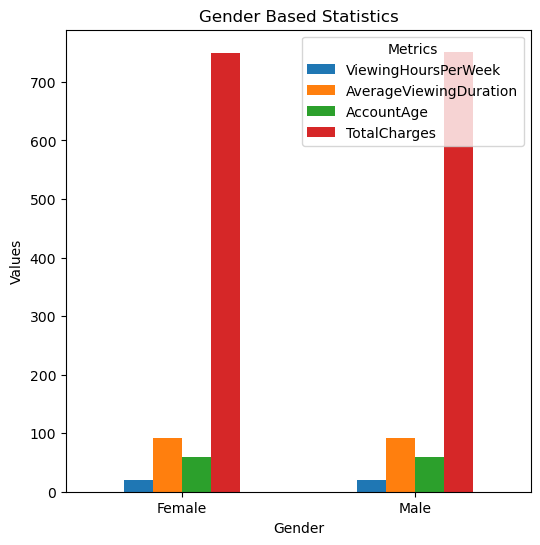

In [23]:
# Understanding of Data Set
grouped_data = df.groupby("Gender").agg({"ViewingHoursPerWeek": "mean",
                                         "AverageViewingDuration": "mean",
                                         "AccountAge": "mean",
                                         "TotalCharges": "mean"})

grouped_data.plot(kind="bar", figsize=(6, 6))
plt.title("Gender Based Statistics")
plt.xlabel("Gender")
plt.ylabel("Values")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

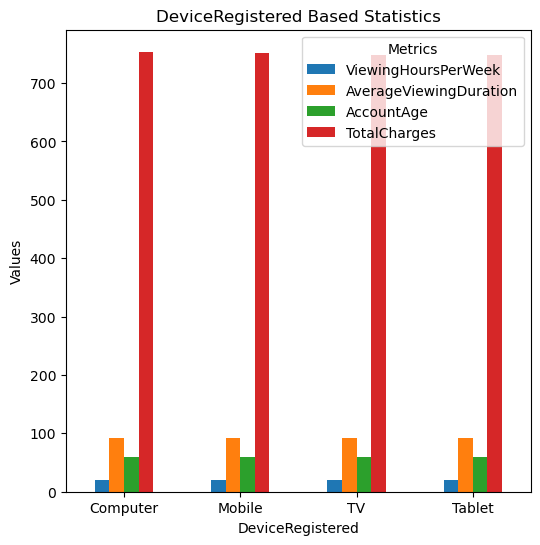

In [24]:
grouped_data = df.groupby("DeviceRegistered").agg({"ViewingHoursPerWeek": "mean",
                                                  "AverageViewingDuration": "mean",
                                                  "AccountAge": "mean",
                                                  "TotalCharges": "mean"})

grouped_data.plot(kind="bar", figsize=(6, 6))
plt.title("DeviceRegistered Based Statistics")
plt.xlabel("DeviceRegistered")
plt.ylabel("Values")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

In [25]:
# Segmentation of AccountAge
print(df["AccountAge"].describe().T)

labels = ["new_customer", "standard_customer", "old_customer"]

bins = [df["AccountAge"].min() - 1,
        24, 60,
        df["AccountAge"].max() + 1]

df["AccountAge_Segment"] = pd.cut(x=df["AccountAge"], bins=bins, labels=labels)

print(df.groupby("AccountAge_Segment").agg({"ViewingHoursPerWeek": "mean",
                                           "AverageViewingDuration": "mean",
                                           "ContentDownloadsPerMonth": ["mean", "count"]}))

count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64
                   ViewingHoursPerWeek AverageViewingDuration  \
                                  mean                   mean   
AccountAge_Segment                                              
new_customer                 20.507195              92.483013   
standard_customer            20.532669              92.123164   
old_customer                 20.481571              92.261785   

                   ContentDownloadsPerMonth          
                                       mean   count  
AccountAge_Segment                                   
new_customer                      24.548743   48786  
standard_customer                 24.480652   73856  
old_customer                      24.499236  121145  


In [26]:
# Segmentation of ViewingHoursPerWeek
print(df["ViewingHoursPerWeek"].describe().T)

labels = ["less_watcher", "watcher", "hard_watcher"]

bins = [df["ViewingHoursPerWeek"].min() - 1,
        df["ViewingHoursPerWeek"].quantile(0.25),
        df["ViewingHoursPerWeek"].quantile(0.75),
        df["ViewingHoursPerWeek"].max() + 1]

df["ViewingHoursPerWeek_Segment"] = pd.cut(x=df["ViewingHoursPerWeek"], bins=bins, labels=labels)

print(df.groupby("ViewingHoursPerWeek_Segment").agg({"ViewingHoursPerWeek": "mean",
                                           "AverageViewingDuration": "mean",
                                           "ContentDownloadsPerMonth": ["mean", "count"]}))

count    243787.000000
mean         20.502179
std          11.243753
min           1.000065
25%          10.763953
50%          20.523116
75%          30.219396
max          39.999723
Name: ViewingHoursPerWeek, dtype: float64
                            ViewingHoursPerWeek AverageViewingDuration  \
                                           mean                   mean   
ViewingHoursPerWeek_Segment                                              
less_watcher                           5.897958              92.000918   
watcher                               20.505635              92.450099   
hard_watcher                          35.099489              92.155133   

                            ContentDownloadsPerMonth          
                                                mean   count  
ViewingHoursPerWeek_Segment                                   
less_watcher                               24.469506   60947  
watcher                                    24.496288  121893  
hard_watcher  

In [27]:
# Creating Child and Adult Classes by ParentalControl and Gender
df.loc[(df["ParentalControl"] == "Yes") & (df["Gender"] == "Male"), "Age_Gender_Segment"] = "Child_Male"
df.loc[(df["ParentalControl"] == "Yes") & (df["Gender"] == "Female"), "Age_Gender_Segment"] = "Child_Female"
df.loc[(df["ParentalControl"] == "No") & (df["Gender"] == "Male"), "Age_Gender_Segment"] = "Adult_Male"
df.loc[(df["ParentalControl"] == "No") & (df["Gender"] == "Female"), "Age_Gender_Segment"] = "Adult_Female"

print(df.groupby("Age_Gender_Segment").agg({"ViewingHoursPerWeek": "mean",
                                           "AverageViewingDuration": "mean",
                                           "ContentDownloadsPerMonth": ["mean", "count"]}))

                   ViewingHoursPerWeek AverageViewingDuration  \
                                  mean                   mean   
Age_Gender_Segment                                              
Adult_Female                 20.568803              92.056005   
Adult_Male                   20.487791              92.484685   
Child_Female                 20.485138              92.296616   
Child_Male                   20.467164              92.218715   

                   ContentDownloadsPerMonth         
                                       mean  count  
Age_Gender_Segment                                  
Adult_Female                      24.556317  60825  
Adult_Male                        24.459878  60877  
Child_Female                      24.525685  61105  
Child_Male                        24.472188  60980  


In [28]:
# Grouping SupportTicketsPerMonth

print("Number of Unique-->", df["SupportTicketsPerMonth"].nunique())

print("Value Counts\n", df["SupportTicketsPerMonth"].value_counts())

print(df.groupby("SupportTicketsPerMonth").agg({"MonthlyCharges": "mean",
                                          "ViewingHoursPerWeek": "mean",
                                          "Churn": ["mean", "count"]}))

df.loc[(6 > df["SupportTicketsPerMonth"]) & (df["SupportTicketsPerMonth"] >= 0), "New_SupportTicketsPerMonth"] = 0

df.loc[(df["SupportTicketsPerMonth"] >= 6), "New_SupportTicketsPerMonth"] = 1
df.head()

Number of Unique--> 10
Value Counts
 SupportTicketsPerMonth
7    24626
4    24618
2    24477
9    24435
8    24400
3    24360
6    24296
0    24292
1    24283
5    24000
Name: count, dtype: int64
                       MonthlyCharges ViewingHoursPerWeek     Churn       
                                 mean                mean      mean  count
SupportTicketsPerMonth                                                    
0                           12.470947           20.632531  0.133583  24292
1                           12.452410           20.433606  0.145081  24283
2                           12.490431           20.421323  0.152020  24477
3                           12.509898           20.369845  0.161289  24360
4                           12.535406           20.630899  0.174547  24618
5                           12.510057           20.388707  0.182750  24000
6                           12.530725           20.636210  0.196041  24296
7                           12.484640           20.458

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  Gender  WatchlistSize  \
0           Mobile            36.758104  ...    Male              3   
1           Tablet            32.450568  ...    Male             23   
2         Computer             7.395160  ...    Male              1   
3           Tablet            27.960389  ...    Male             24   
4               TV            20.083397  ...  Female              0   

  ParentalControl  SubtitlesEnabled  CustomerID Churn  AccountAge_Segment  \
0              No                No  CB6SXPNVZA     0        new_customer   
1              No               Yes  S7R2G87O09     0   standard_customer   
2             Yes               Yes  EASDC20BDT     0        old_customer   
3             Yes               Yes  NPF69NT69N     0   standard_customer   
4              No                No  4LGYPK7VOL     0   standard_customer   

  ViewingHoursPerWeek_Segment Age_Gender_Segment New_SupportTicketsPerMonth  
0                hard_watcher         Adult_Male                        0.0  
1                hard_watcher         Adult_Male                        1.0  
2                less_watcher         Child_Male                        1.0  
3                     watcher         Child_Male                        0.0  
4                     watcher       Adult_Female                        0.0  

[5 rows x 25 columns]

In [29]:
df.drop("SupportTicketsPerMonth", axis=1, inplace=True)

In [30]:
cat_var, cat_but_car, num_var = grab_variable(df)
cat_var.remove("Churn")

df = pd.get_dummies(data=df, columns=cat_var, drop_first=True, dtype="int64")

Observation: 243787
Number of Variables: 24
Number of Categoric Variables: 15
Number of Num but Cat Variables: 2
Number of Cat but Cardinal Variables: 1
Number of Numeric Variables: 8


In [31]:
df.head()

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0          20       11.055215    221.104302            36.758104   
1          57        5.175208    294.986882            32.450568   
2          73       12.106657    883.785952             7.395160   
3          32        7.263743    232.439774            27.960389   
4          57       16.953078    966.325422            20.083397   

   AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0               63.531377                        10    2.176498   
1               25.725595                        18    3.478632   
2               57.364061                        23    4.238824   
3              131.537507                        30    4.276013   
4               45.356653                        20    3.616170   

   WatchlistSize  CustomerID  Churn  ...  ParentalControl_Yes  \
0              3  CB6SXPNVZA      0  ...                    0   
1             23  S7R2G87O09      0  ...                    0   
2              1  EASDC20BDT      0  ...                    1   
3             24  NPF69NT69N      0  ...                    1   
4              0  4LGYPK7VOL      0  ...                    0   

   SubtitlesEnabled_Yes  AccountAge_Segment_standard_customer  \
0                     0                                     0   
1                     1                                     1   
2                     1                                     0   
3                     1                                     1   
4                     0                                     1   

   AccountAge_Segment_old_customer  ViewingHoursPerWeek_Segment_watcher  \
0                                0                                    0   
1                                0                                    0   
2                                1                                    0   
3                                0                                    1   
4                                0                                    1   

   ViewingHoursPerWeek_Segment_hard_watcher  Age_Gender_Segment_Adult_Male  \
0                                         1                              1   
1                                         1                              1   
2                                         0                              0   
3                                         0                              0   
4                                         0                              0   

   Age_Gender_Segment_Child_Female  Age_Gender_Segment_Child_Male  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   New_SupportTicketsPerMonth_1.0  
0                               0  
1                               1  
2                               1  
3                               0  
4                               0  

[5 rows x 37 columns]

Observation: 243787
Number of Variables: 37
Number of Categoric Variables: 28
Number of Num but Cat Variables: 28
Number of Cat but Cardinal Variables: 1
Number of Numeric Variables: 8


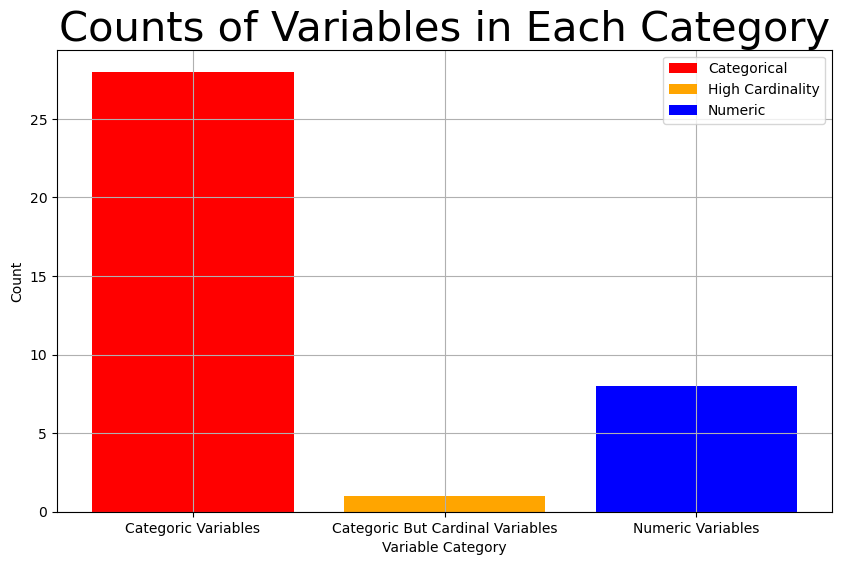

In [32]:
cat_var, cat_but_car, num_var = grab_variable(df)
plot_variable_counts(cat_var, cat_but_car, num_var)

In [33]:
df.head()

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0          20       11.055215    221.104302            36.758104   
1          57        5.175208    294.986882            32.450568   
2          73       12.106657    883.785952             7.395160   
3          32        7.263743    232.439774            27.960389   
4          57       16.953078    966.325422            20.083397   

   AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0               63.531377                        10    2.176498   
1               25.725595                        18    3.478632   
2               57.364061                        23    4.238824   
3              131.537507                        30    4.276013   
4               45.356653                        20    3.616170   

   WatchlistSize  CustomerID  Churn  ...  ParentalControl_Yes  \
0              3  CB6SXPNVZA      0  ...                    0   
1             23  S7R2G87O09      0  ...                    0   
2              1  EASDC20BDT      0  ...                    1   
3             24  NPF69NT69N      0  ...                    1   
4              0  4LGYPK7VOL      0  ...                    0   

   SubtitlesEnabled_Yes  AccountAge_Segment_standard_customer  \
0                     0                                     0   
1                     1                                     1   
2                     1                                     0   
3                     1                                     1   
4                     0                                     1   

   AccountAge_Segment_old_customer  ViewingHoursPerWeek_Segment_watcher  \
0                                0                                    0   
1                                0                                    0   
2                                1                                    0   
3                                0                                    1   
4                                0                                    1   

   ViewingHoursPerWeek_Segment_hard_watcher  Age_Gender_Segment_Adult_Male  \
0                                         1                              1   
1                                         1                              1   
2                                         0                              0   
3                                         0                              0   
4                                         0                              0   

   Age_Gender_Segment_Child_Female  Age_Gender_Segment_Child_Male  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   New_SupportTicketsPerMonth_1.0  
0                               0  
1                               1  
2                               1  
3                               0  
4                               0  

[5 rows x 37 columns]

C:\Users\omshi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


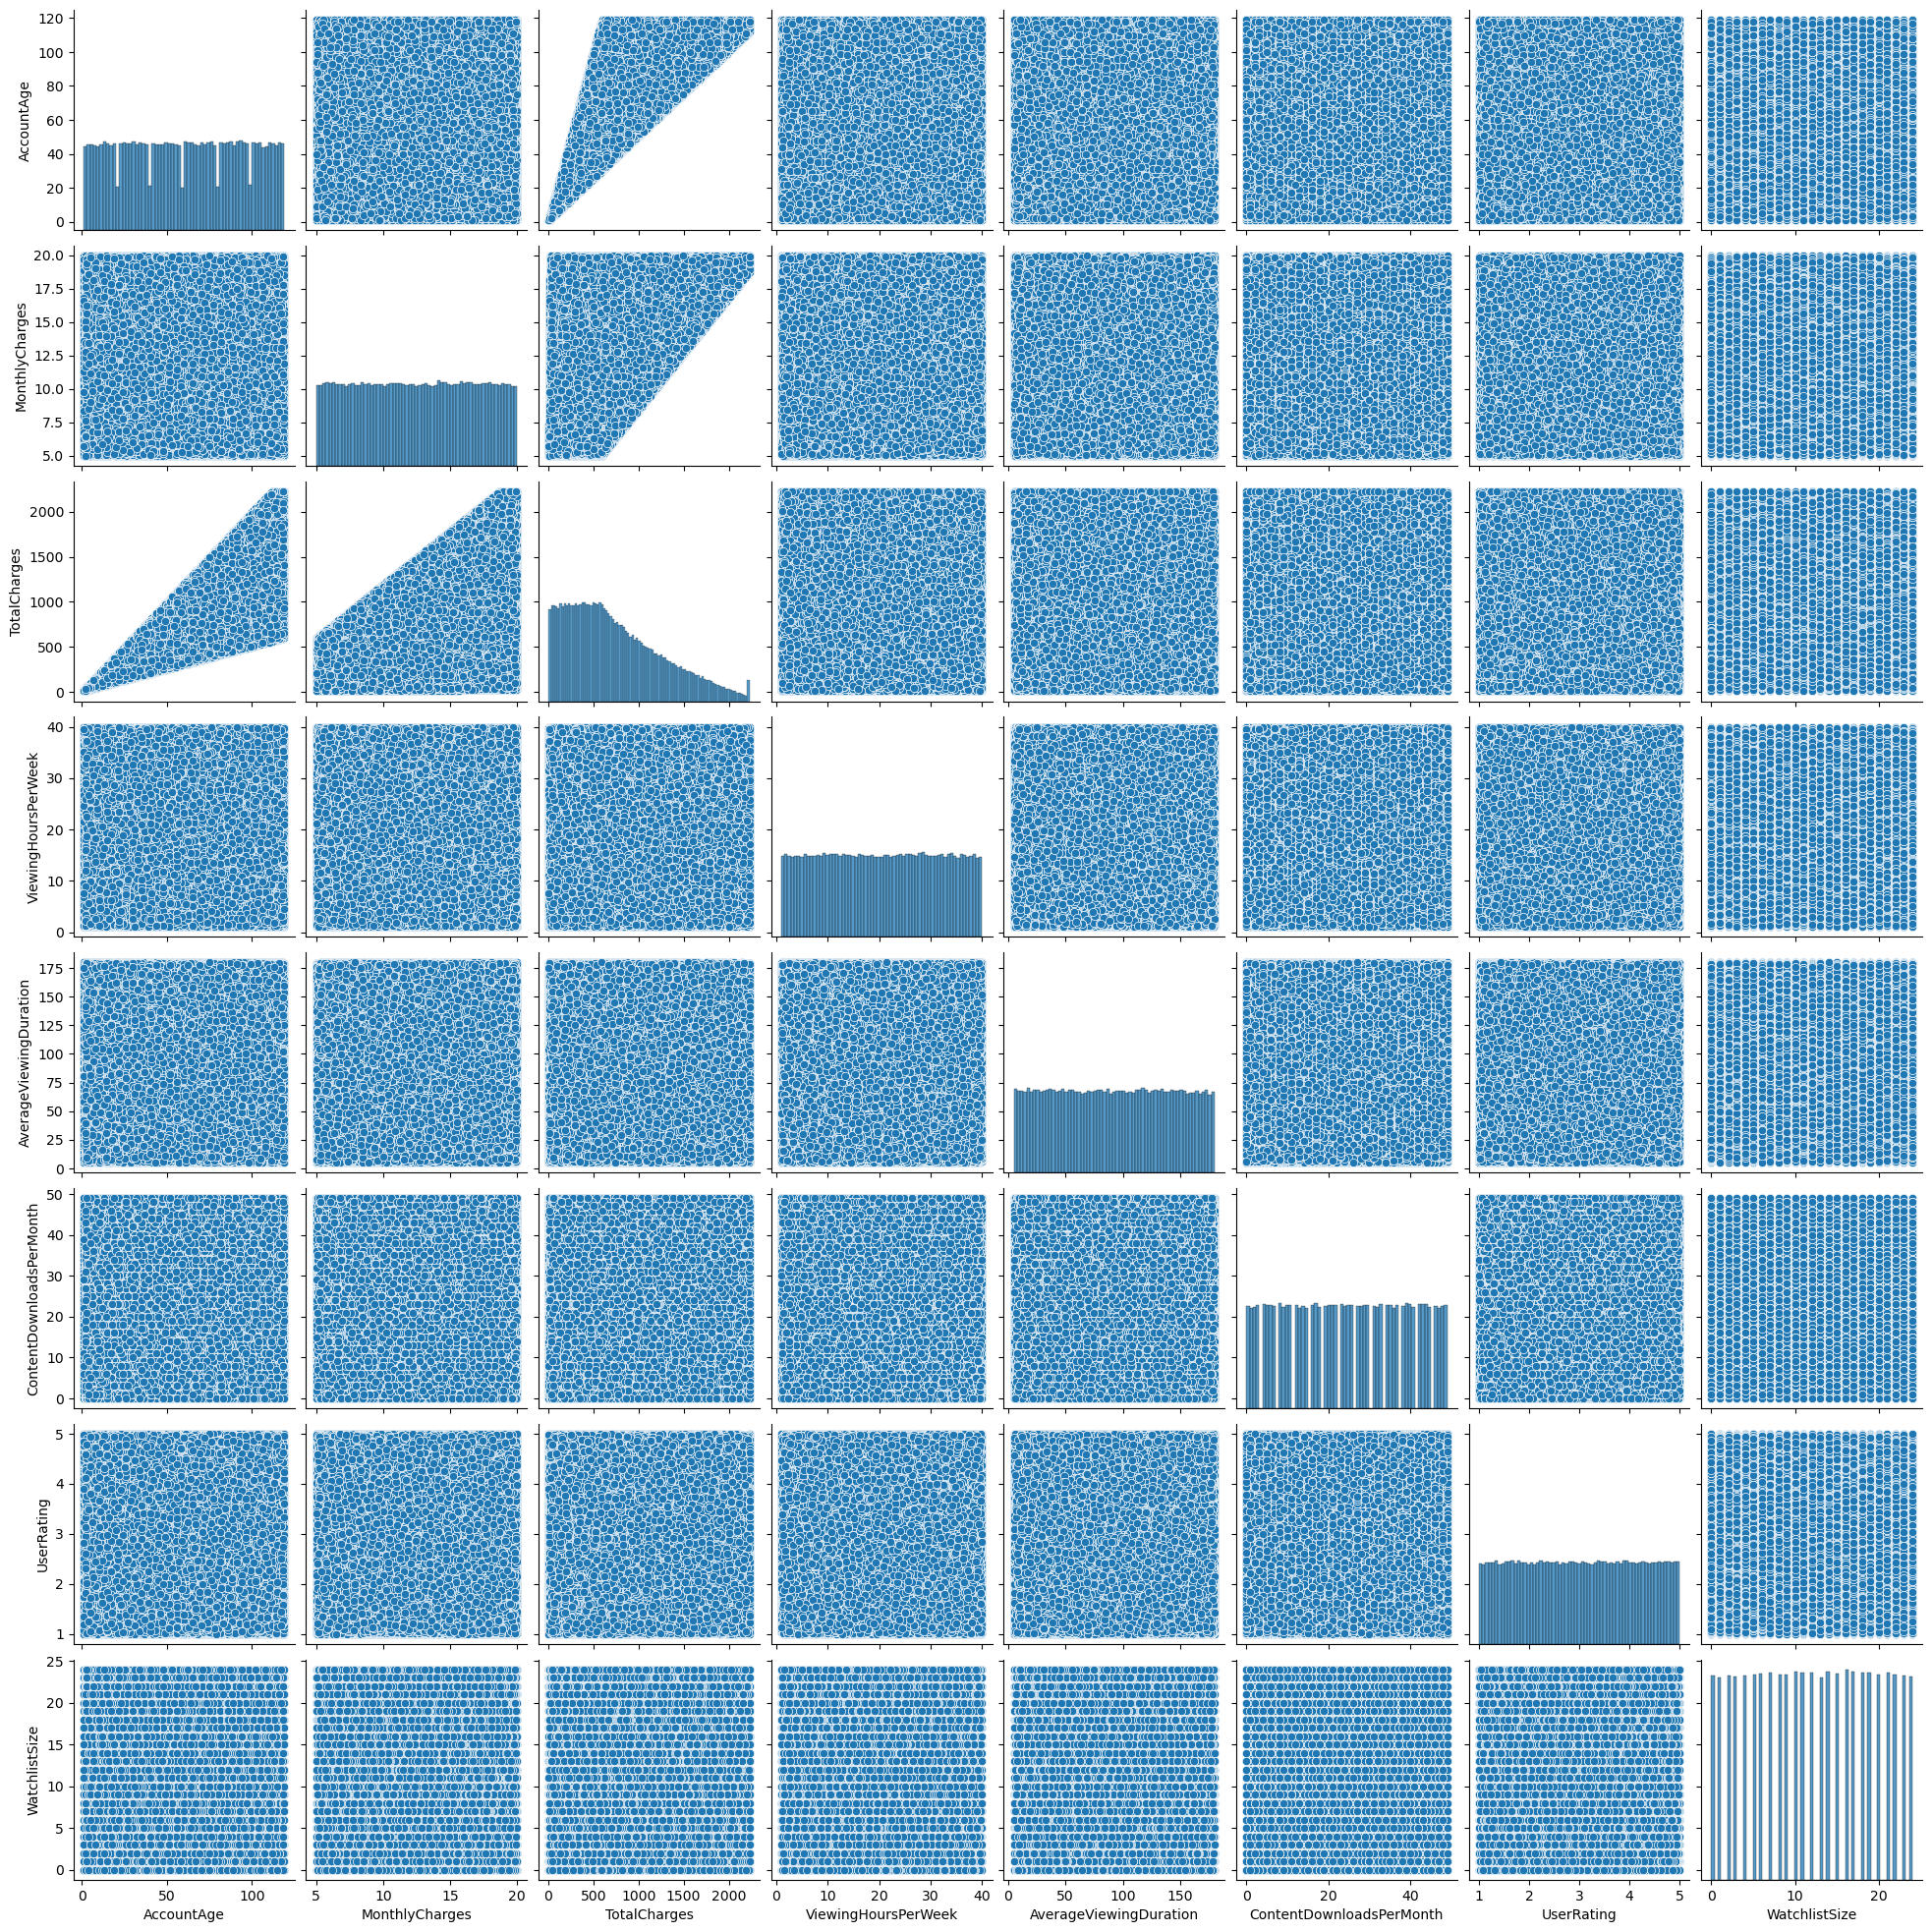

In [34]:
sns.pairplot(data=df[num_var])
plt.show()

In [35]:
def standardization(dataframe, variable, select=1):
    if select == 1:
        ss = StandardScaler()
        dataframe[variable] = ss.fit_transform(dataframe[variable])
    elif select == 2:
        mms = MinMaxScaler()
        dataframe[variable] = mms.fit_transform(dataframe[variable])
    elif select == 3:
        rs = RobustScaler()
        dataframe[variable] = rs.fit_transform(dataframe[variable])
    else:
        print("Please Enter Correct Number for Scaling")

standardization(df, num_var)

In [36]:
df.head()

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0   -1.169131       -0.331703     -1.013161             1.445777   
1   -0.089945       -1.690423     -0.871785             1.062671   
2    0.376731       -0.088741      0.254900            -1.165718   
3   -0.819125       -1.207816     -0.991470             0.663322   
4   -0.089945        1.031143      0.412842            -0.037246   

   AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0               -0.568906                 -1.005712   -0.715179   
1               -1.317459                 -0.450971    0.411960   
2               -0.691019                 -0.104258    1.069988   
3                0.777613                  0.381141    1.102179   
4               -0.928765                 -0.312285    0.531014   

   WatchlistSize  CustomerID  Churn  ...  ParentalControl_Yes  \
0      -1.253786  CB6SXPNVZA      0  ...                    0   
1       1.526687  S7R2G87O09      0  ...                    0   
2      -1.531833  EASDC20BDT      0  ...                    1   
3       1.665711  NPF69NT69N      0  ...                    1   
4      -1.670857  4LGYPK7VOL      0  ...                    0   

   SubtitlesEnabled_Yes  AccountAge_Segment_standard_customer  \
0                     0                                     0   
1                     1                                     1   
2                     1                                     0   
3                     1                                     1   
4                     0                                     1   

   AccountAge_Segment_old_customer  ViewingHoursPerWeek_Segment_watcher  \
0                                0                                    0   
1                                0                                    0   
2                                1                                    0   
3                                0                                    1   
4                                0                                    1   

   ViewingHoursPerWeek_Segment_hard_watcher  Age_Gender_Segment_Adult_Male  \
0                                         1                              1   
1                                         1                              1   
2                                         0                              0   
3                                         0                              0   
4                                         0                              0   

   Age_Gender_Segment_Child_Female  Age_Gender_Segment_Child_Male  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   New_SupportTicketsPerMonth_1.0  
0                               0  
1                               1  
2                               1  
3                               0  
4                               0  

[5 rows x 37 columns]

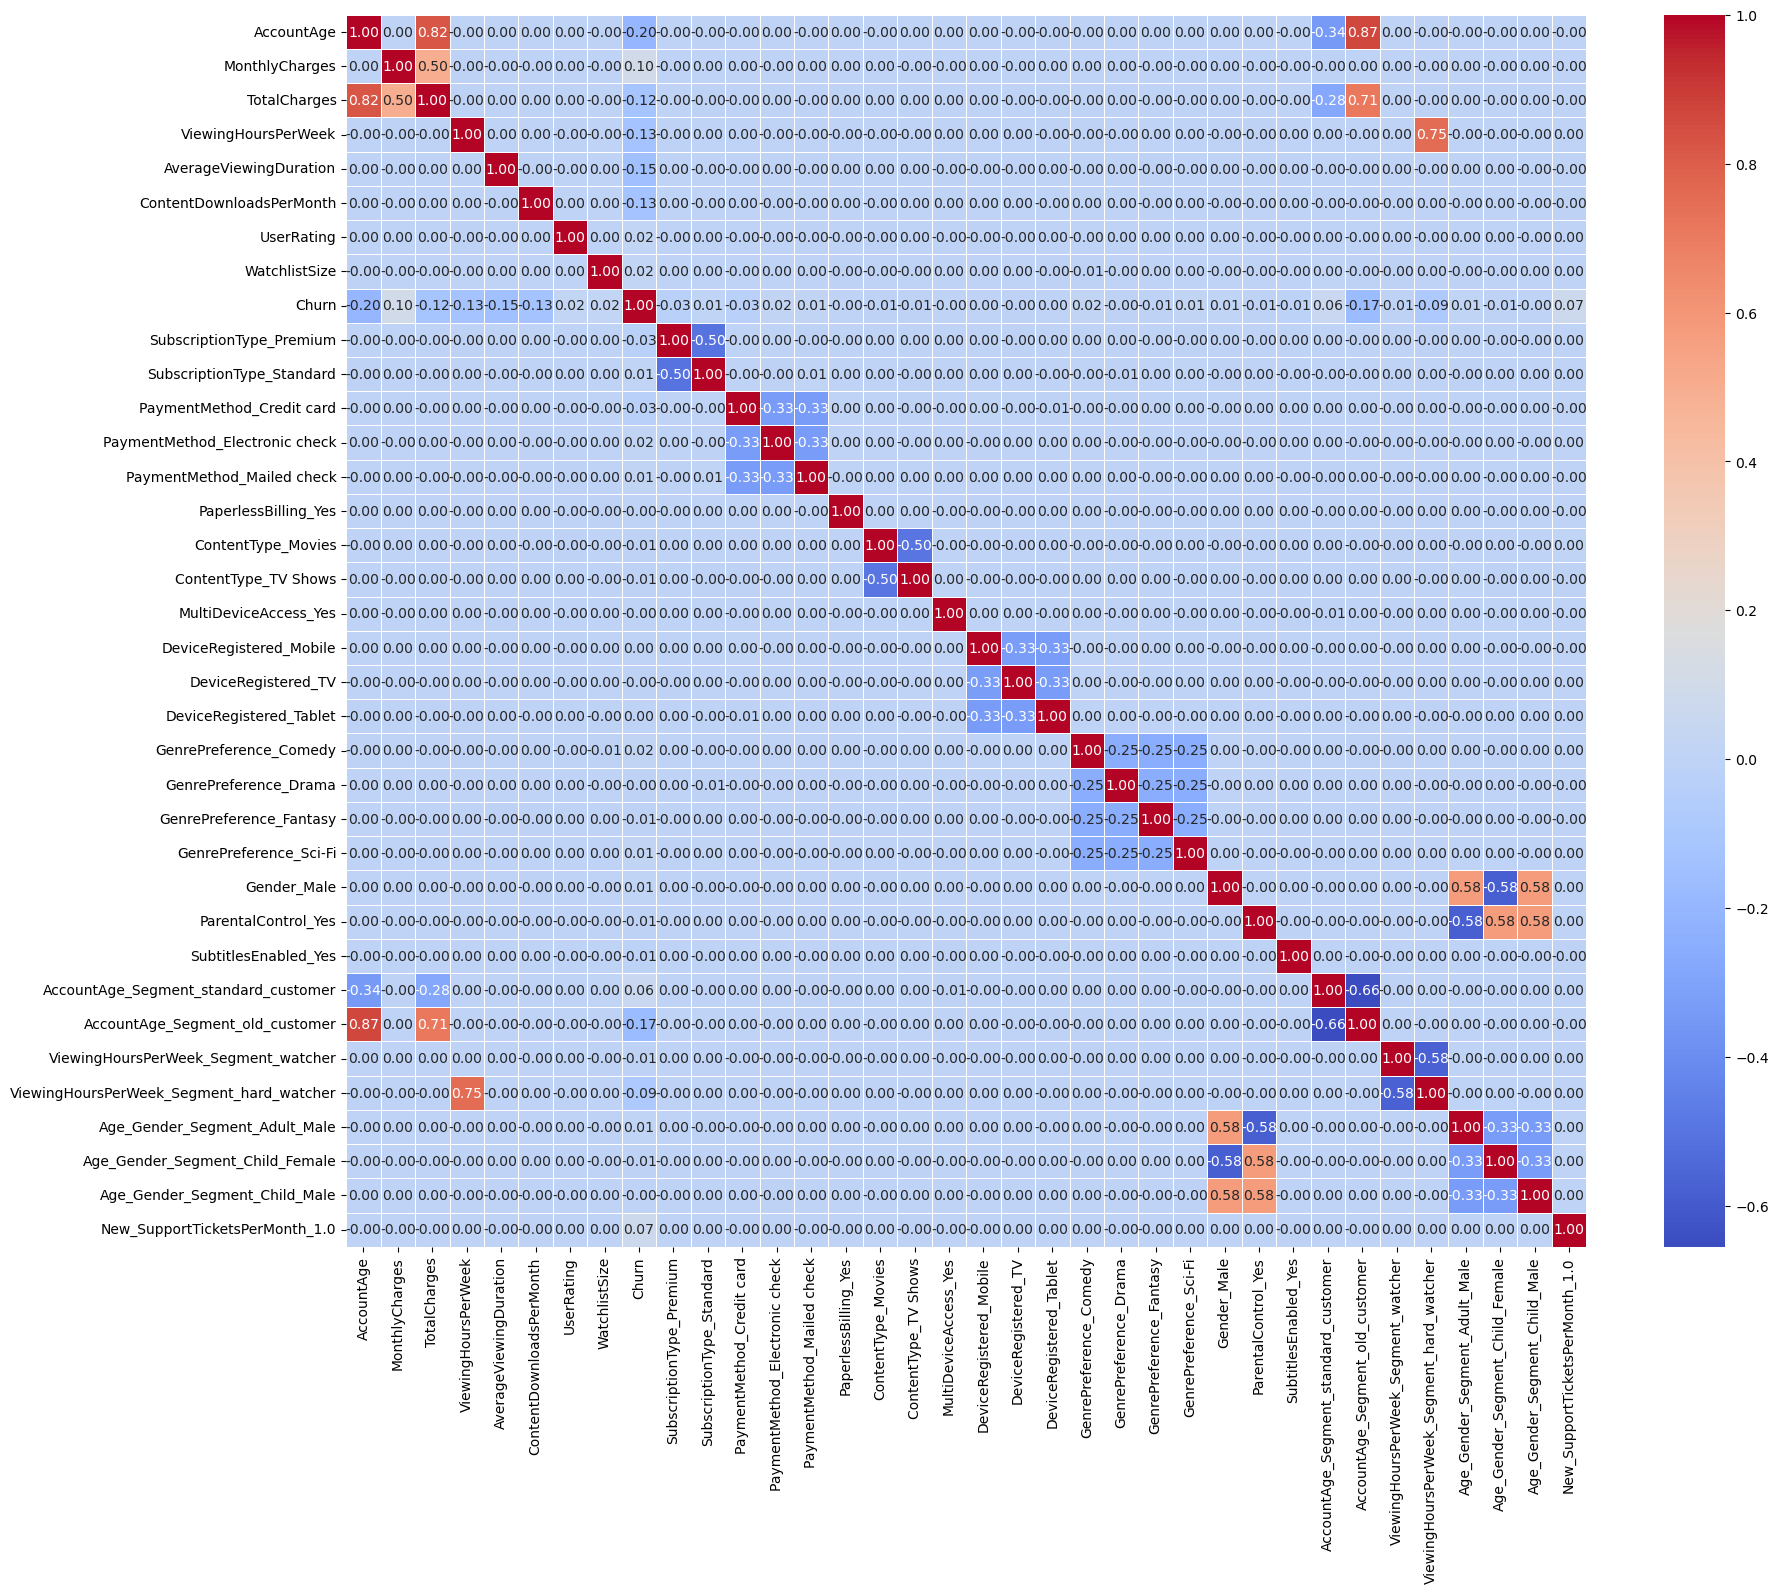

In [37]:
df.drop("CustomerID", axis=1, inplace=True)

plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

In [38]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = [('LOG', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ("AdaBoost", AdaBoostClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBRFClassifier(objective='reg:squarederror')),
          ("LightGBM", LGBMClassifier())]

f1_score_list = []

for name, clf in models:
    acc = cross_validate(clf, 
                        X_test, y_test,
                        cv=3,
                        scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    
    print("Accuracy-->", round(acc["test_accuracy"].mean(), 4), name)
    print("Precision-->", round(acc["test_precision"].mean(), 4), name)
    print("Recall-->", round(acc["test_recall"].mean(), 4), name)
    print("f1-->", round(acc["test_f1"].mean(), 4), name)
    print("roc_auc-->", round(acc["test_roc_auc"].mean(), 4), name)
    
    f1_score_list.append(acc["test_f1"].mean())
    f1_score_list.append(name)

print(f1_score_list)

Accuracy--> 0.8248 LOG
Precision--> 0.5652 LOG
Recall--> 0.1143 LOG
f1--> 0.1901 LOG
roc_auc--> 0.7499 LOG
Accuracy--> 0.8015 KNN
Precision--> 0.3693 KNN
Recall--> 0.1446 KNN
f1--> 0.2078 KNN
roc_auc--> 0.6297 KNN
Accuracy--> 0.7315 CART
Precision--> 0.2747 CART
Recall--> 0.3 CART
f1--> 0.2868 CART
roc_auc--> 0.5631 CART
Accuracy--> 0.8218 RF
Precision--> 0.5466 RF
Recall--> 0.0584 RF
f1--> 0.1056 RF
roc_auc--> 0.7255 RF


C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy--> 0.8228 AdaBoost
Precision--> 0.5327 AdaBoost
Recall--> 0.1251 AdaBoost
f1--> 0.2024 AdaBoost
roc_auc--> 0.7417 AdaBoost
Accuracy--> 0.8238 GBM
Precision--> 0.5624 GBM
Recall--> 0.0947 GBM
f1--> 0.1621 GBM
roc_auc--> 0.7451 GBM
Accuracy--> 0.8222 XGBoost
Precision--> 0.5836 XGBoost
Recall--> 0.0444 XGBoost
f1--> 0.0824 XGBoost
roc_auc--> 0.7293 XGBoost
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7313, number of negative: 33318
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1526
[LightGBM] [Info] Number of data points in the train set: 40631, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179986 -> initscore=-1.516444
[LightGBM] [Info] Start training from score -1.5164

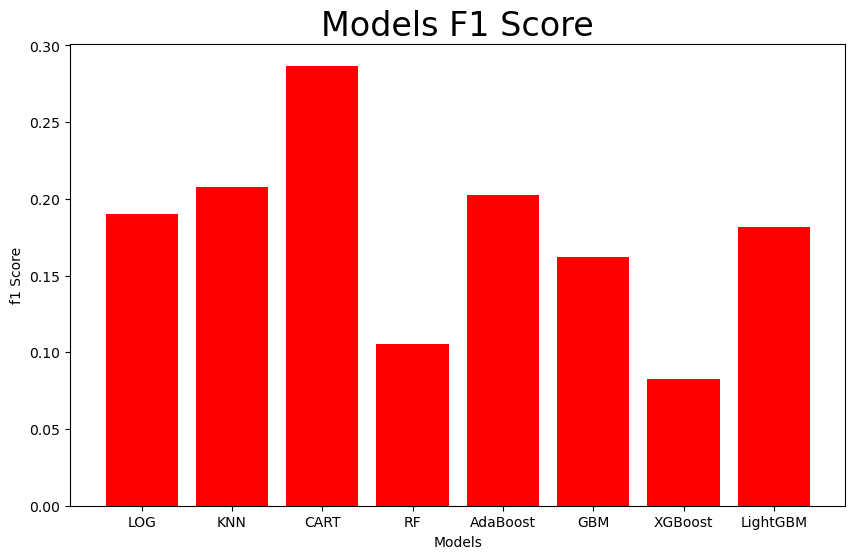

In [39]:
models = f1_score_list[1::2]
f1_scores = f1_score_list[::2]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color="red")
plt.xlabel('Models')
plt.ylabel('f1 Score')
plt.title('Models F1 Score', fontsize=24)
plt.show()

*** After sampling ***
Percentage of 'Churn': 18.123197709475892
Percentage of 'Not Churn': 81.87680229052411


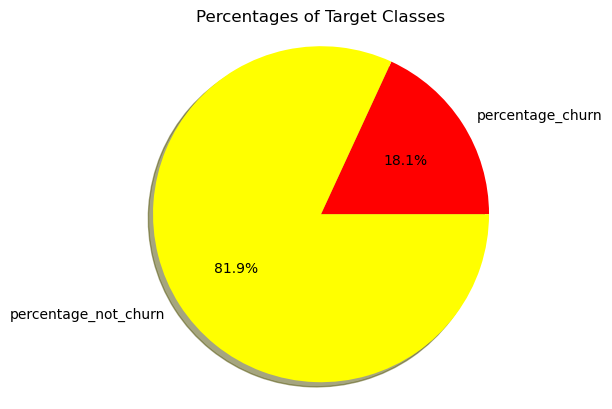

In [40]:
# PIE CHART
churn_count = (df['Churn'] == 1).sum()
not_churn_count = (df['Churn'] == 0).sum()

total_count = len(df)

percentage_churn = (churn_count / total_count) * 100
percentage_not_churn = (not_churn_count / total_count) * 100
print("*** After sampling ***")
print("Percentage of 'Churn':", percentage_churn)
print("Percentage of 'Not Churn':", percentage_not_churn)

# Pasta Grafiği Oluşturma
labels = ['percentage_churn', 'percentage_not_churn']
sizes = [percentage_churn, percentage_not_churn]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=["red", "yellow"],
        shadow=True)
plt.axis('equal')
plt.title("Percentages of Target Classes")
plt.show()

In [41]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

resampled_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name='Churn')], axis=1)

X_resampled = resampled_data.drop('Churn', axis=1)
y_resampled = resampled_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.25,
                                                    random_state=42)

*** After sampling ***
Percentage of 'Churn': 50.0
Percentage of 'Not Churn': 50.0


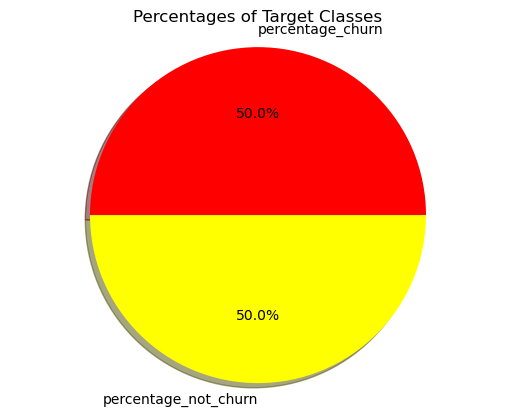

In [42]:
# PIE CHART
churn_count = (resampled_data['Churn'] == 1).sum()
not_churn_count = (resampled_data['Churn'] == 0).sum()

total_count = len(resampled_data)

percentage_churn = (churn_count / total_count) * 100
percentage_not_churn = (not_churn_count / total_count) * 100
print("*** After sampling ***")
print("Percentage of 'Churn':", percentage_churn)
print("Percentage of 'Not Churn':", percentage_not_churn)

# Pasta Grafiği Oluşturma
labels = ['percentage_churn', 'percentage_not_churn']
sizes = [percentage_churn, percentage_not_churn]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=["red", "yellow"],
        shadow=True)
plt.axis('equal')
plt.title("Percentages of Target Classes")
plt.show()

In [43]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Test Set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = model.predict_proba(X_test)[:, 1] # probability of class 1 occurs
print("Roc_AUC-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     37281
           1       0.85      0.87      0.86     37533

    accuracy                           0.86     74814
   macro avg       0.86      0.86      0.86     74814
weighted avg       0.86      0.86      0.86     74814

Roc_AUC--> 0.9358902815236924


In [45]:
# Train Set
y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = model.predict_proba(X_train)[:, 1]
print("ROC_AUC-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112346
           1       1.00      1.00      1.00    112094

    accuracy                           1.00    224440
   macro avg       1.00      1.00      1.00    224440
weighted avg       1.00      1.00      1.00    224440

ROC_AUC--> 0.9999999999999999


In [46]:
# Parameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [47]:
params = {"max_depth": range(2, 15),  #  branching and depth of the tree
          "n_estimators": range(10, 50),  # number of created trees
          "min_samples_split": [2, 3, 4],  # minimum sample for splitting nodes
          "max_features": ["sqrt", "log", None,  "auto"],  # Maximum number of features to consider in each split
          "criterion": ["gini", "entropy"]}  # Splitting Criterions

rf_random = RandomizedSearchCV(estimator=model,  # ML Model
                               param_distributions=params,  # hiperparameters
                               n_iter=20,  # number of iterations (keep low for random forests model)
                               cv=3,  # cross validate value (keep low for random forests model)
                               random_state=42,
                               n_jobs=-1)  # CPU work with full performance
                              # verbose=2 to see transaction history and info.

rf_random.fit(X_train, y_train)

C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\omshi\anaconda3\Lib\site-packages\s

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 15),
                                        'max_features': ['sqrt', 'log', None,
                                                         'auto'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': range(10, 50)},
                   random_state=42)

In [48]:
print("Best Params-->", rf_random.best_params_)
print("Best Score-->", rf_random.best_score_)

Best Params--> {'n_estimators': 40, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 13, 'criterion': 'gini'}
Best Score--> 0.7675548017459666


In [49]:
model_tuned = model.set_params(**rf_random.best_params_).fit(X_train, y_train)

In [50]:
# Test Set
y_pred = model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = model_tuned.predict_proba(X_test)[:, 1]  # probability of class 1 occurs
print("Roc_AUC-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     37281
           1       0.76      0.79      0.78     37533

    accuracy                           0.77     74814
   macro avg       0.77      0.77      0.77     74814
weighted avg       0.77      0.77      0.77     74814

Roc_AUC--> 0.852407000300435


In [51]:
# Train Set
y_pred_train = model_tuned.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = model_tuned.predict_proba(X_train)[:, 1]
print("ROC_AUC-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82    112346
           1       0.81      0.85      0.83    112094

    accuracy                           0.82    224440
   macro avg       0.83      0.82      0.82    224440
weighted avg       0.83      0.82      0.82    224440

ROC_AUC--> 0.9062606266818


In [52]:
params_grid = {"max_depth": [15, 17],
              "n_estimators": [40, 50, 70]}

rf_grid = GridSearchCV(estimator=model,
                      param_grid=params_grid,
                      cv=2,
                      scoring="f1",
                      n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


In [53]:
print("Best Parameters-->", rf_grid.best_params_)
print("Best Scores-->", rf_grid.best_score_)

Best Parameters--> {'max_depth': 17, 'n_estimators': 70}
Best Scores--> 0.8042136893872744


In [54]:
model_tuned = model_tuned.set_params(**rf_grid.best_params_).fit(X_train, y_train)

In [55]:
# Test Set
y_pred = model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = model_tuned.predict_proba(X_test)[:, 1]
print("roc_auc-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     37281
           1       0.80      0.85      0.82     37533

    accuracy                           0.82     74814
   macro avg       0.82      0.82      0.82     74814
weighted avg       0.82      0.82      0.82     74814

roc_auc--> 0.8999440259387723


In [56]:
# Train Set
y_pred_train = model_tuned.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = model_tuned.predict_proba(X_train)[:, 1]
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94    112346
           1       0.91      0.98      0.95    112094

    accuracy                           0.94    224440
   macro avg       0.95      0.94      0.94    224440
weighted avg       0.95      0.94      0.94    224440

roc_auc--> 0.9867291978435777


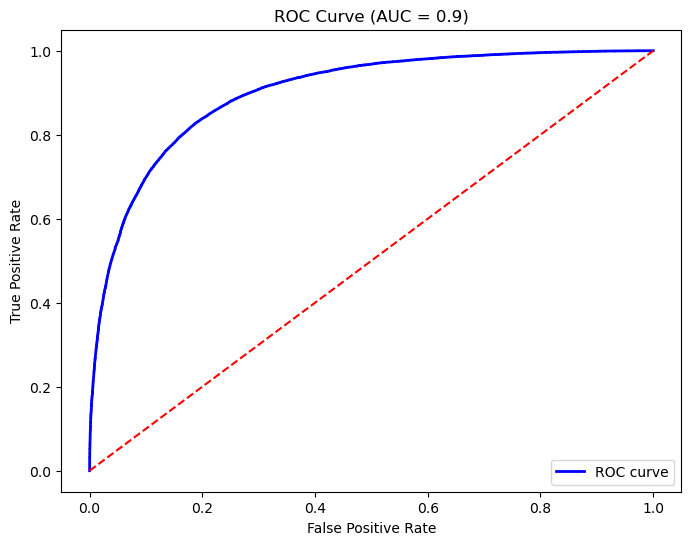

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {})'.format(round(roc_auc_score(y_test, y_prob), 3)))
plt.legend(loc='lower right')
plt.show()

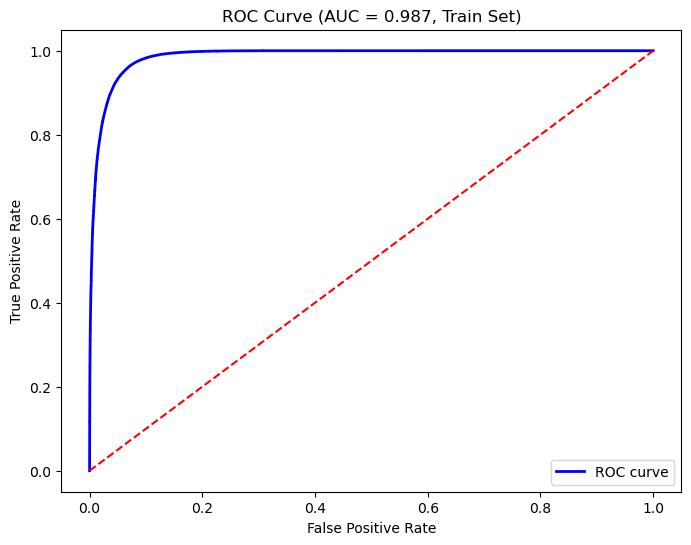

In [58]:
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {}, Train Set)'.format(round(roc_auc_score(y_train, y_prob_train), 3)))
plt.legend(loc='lower right')
plt.show()

In [59]:
# Test Set K-Fold Cross Validation
cv_results = cross_validate(model_tuned, 
                            X_test, y_test,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy:", round(cv_results["test_accuracy"].mean(), 2))
print("Precision:", round(cv_results["test_precision"].mean(), 2))
print("Recall:", round(cv_results["test_recall"].mean(), 2))
print("f1:", round(cv_results["test_f1"].mean(), 2))
print("roc_auc:", round(cv_results["test_roc_auc"].mean(), 2))

Accuracy: 0.78
Precision: 0.77
Recall: 0.8
f1: 0.79
roc_auc: 0.86


In [60]:
# Train Set K-Fold Cross Validation
cv_results = cross_validate(model_tuned, 
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy:", round(cv_results["test_accuracy"].mean(), 2))
print("Precision:", round(cv_results["test_precision"].mean(), 2))
print("Recall:", round(cv_results["test_recall"].mean(), 2))
print("f1:", round(cv_results["test_f1"].mean(), 2))
print("roc_auc:", round(cv_results["test_roc_auc"].mean(), 2))

Accuracy: 0.81
Precision: 0.79
Recall: 0.84
f1: 0.82
roc_auc: 0.89


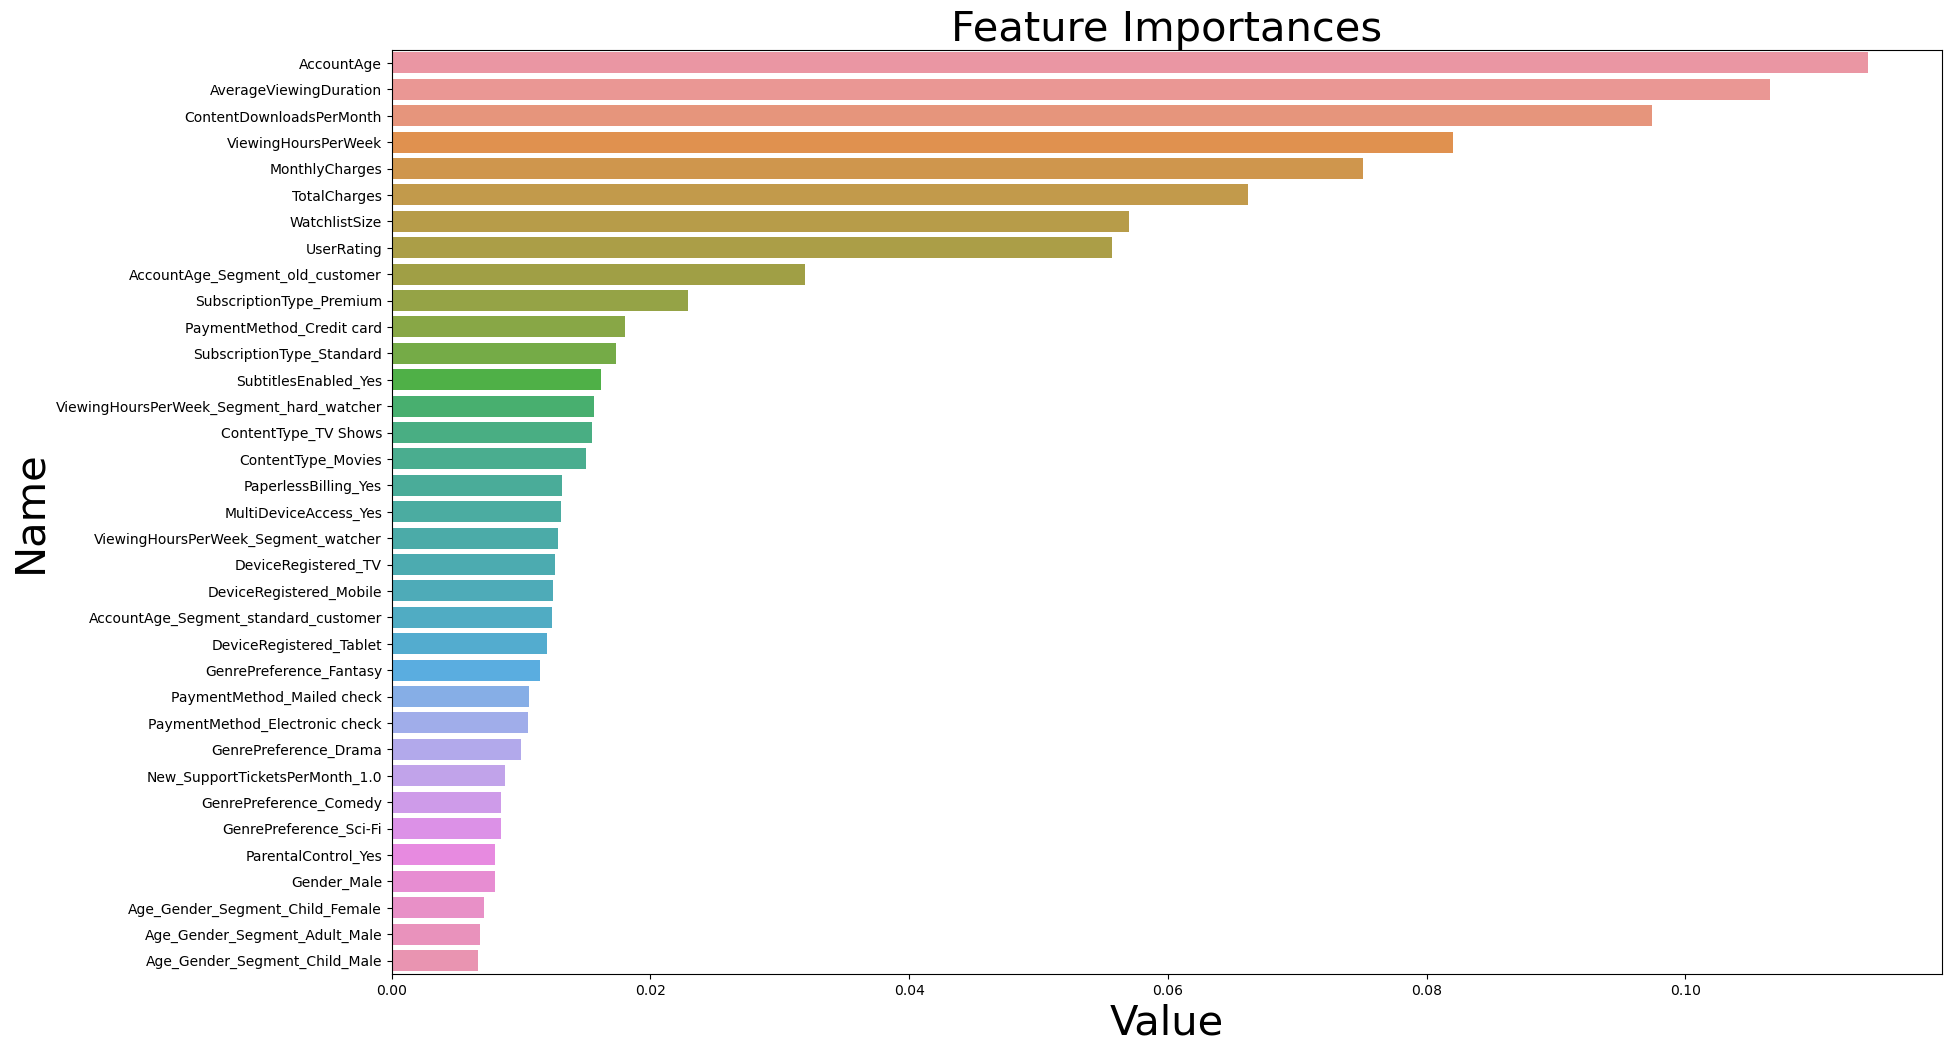

In [61]:
def plot_feature_improtances(model, feature, num=len(X)):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,
                                "Name": feature.columns})
    plt.figure(figsize=(20, 12))
    sns.barplot(x="Value", y="Name", data=feature_imp.sort_values("Value", ascending=False)[0: num])
    plt.title("Feature Importances", fontsize=30)
    plt.xlabel("Value", fontsize=30)
    plt.ylabel("Name", fontsize=30)
    plt.show()

plot_feature_improtances(model_tuned, X_test)

In [62]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

resampled_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled,
                                                         name='Churn')], axis=1)


X_resampled = resampled_data.drop('Churn', axis=1)
y_resampled = resampled_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.25,
                                                    random_state=42)

class_weights = {0: 1, 1: 3}  # Penalty Coefficients
cart_model = DecisionTreeClassifier(random_state=45, class_weight=class_weights).fit(X_train, y_train)

In [63]:
# Test Set
y_pred = cart_model.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = cart_model.predict_proba(X_test)[:, 1]
print("roc_auc-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     28033
           1       0.73      0.73      0.73     28140

    accuracy                           0.73     56173
   macro avg       0.73      0.73      0.73     56173
weighted avg       0.73      0.73      0.73     56173

roc_auc--> 0.7286727300099732


In [64]:
# Train Set
y_pred_train = cart_model.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = cart_model.predict_proba(X_train)[:, 1]
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84313
           1       1.00      1.00      1.00     84206

    accuracy                           1.00    168519
   macro avg       1.00      1.00      1.00    168519
weighted avg       1.00      1.00      1.00    168519

roc_auc--> 1.0


In [65]:
print(cart_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 45, 'splitter': 'best'}


In [66]:
params = {"criterion": ["gini", "entropy"],
          "max_depth": range(2, 30),
          "splitter": ["best", "random"],
          "min_samples_split": range(2, 10),
          "min_samples_leaf": range(1, 5),
          "max_features": ["auto", "sqrt", "log2", 3, 5, 7]}

cart_random = RandomizedSearchCV(estimator=cart_model,
                               param_distributions=params,
                               cv=3,
                               random_state=42,
                               n_iter=100, n_jobs=-1)
cart_random.fit(X_train, y_train)

C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\omshi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\omshi\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 3},
                                                    random_state=45),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         3, 5, 7],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [67]:
print("Best Parameters-->", cart_random.best_params_)
print("Best Score-->", cart_random.best_score_)

Best Parameters--> {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 22, 'criterion': 'gini'}
Best Score--> 0.706169630724132


In [68]:
cart_tuned_model = cart_model.set_params(**cart_random.best_params_).fit(X_train, y_train)

In [69]:
# Test Set
y_pred = cart_tuned_model.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = cart_tuned_model.predict_proba(X_test)[:, 1]
print("roc_auc-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     28033
           1       0.69      0.81      0.75     28140

    accuracy                           0.72     56173
   macro avg       0.73      0.72      0.72     56173
weighted avg       0.73      0.72      0.72     56173

roc_auc--> 0.7485889022661916


In [70]:
# Train Set
y_pred_train = cart_tuned_model.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = cart_tuned_model.predict_proba(X_train)[:, 1]
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     84313
           1       0.85      0.99      0.92     84206

    accuracy                           0.91    168519
   macro avg       0.92      0.91      0.91    168519
weighted avg       0.92      0.91      0.91    168519

roc_auc--> 0.9736847308996063


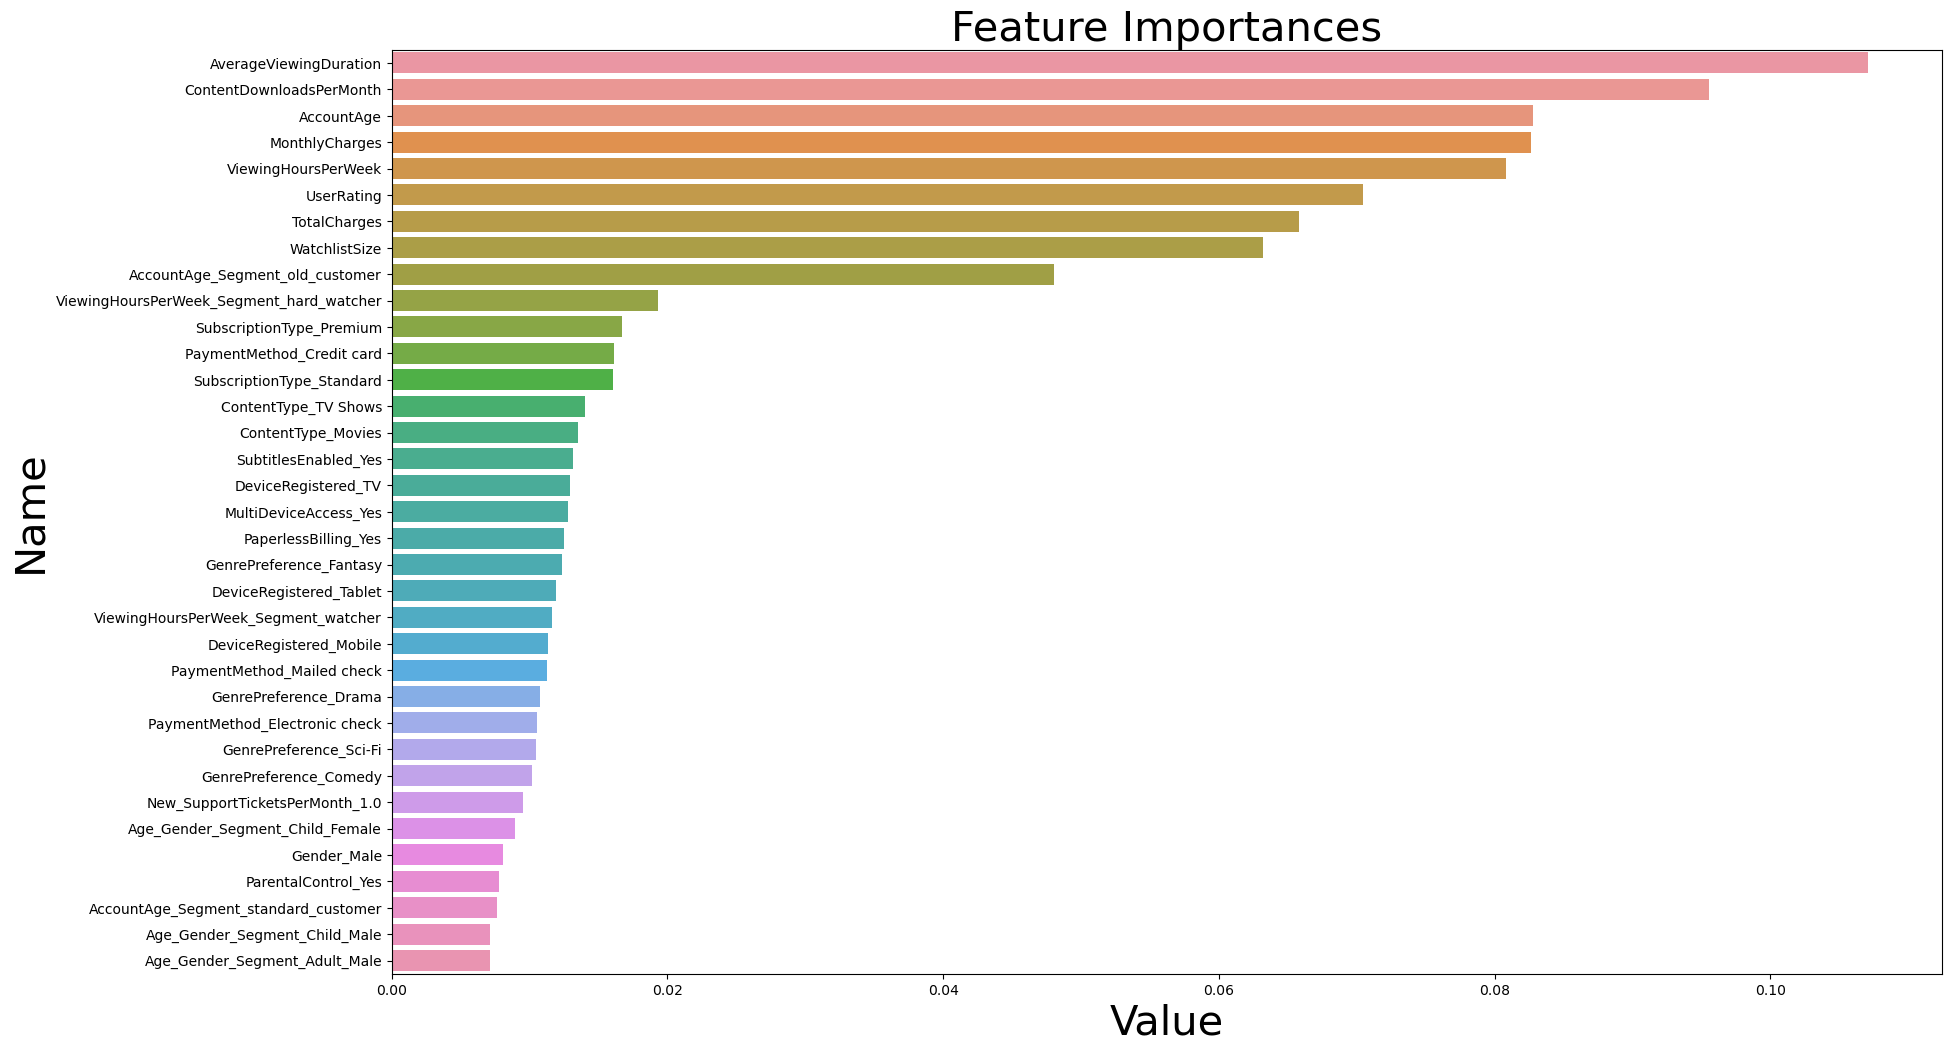

In [71]:
plot_feature_improtances(cart_tuned_model, X_test)

In [72]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     28033
           1       0.82      0.77      0.79     28140

    accuracy                           0.80     56173
   macro avg       0.80      0.80      0.80     56173
weighted avg       0.80      0.80      0.80     56173



In [73]:
y_pred_train = bbc.predict(X_train)
print(balanced_accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.9924252341831493
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     84313
           1       1.00      0.99      0.99     84206

    accuracy                           0.99    168519
   macro avg       0.99      0.99      0.99    168519
weighted avg       0.99      0.99      0.99    168519



In [74]:
df2 = df_.copy()
df2.head()

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
0           Mobile            36.758104  ...                        10   
1           Tablet            32.450568  ...                        18   
2         Computer             7.395160  ...                        23   
3           Tablet            27.960389  ...                        30   
4               TV            20.083397  ...                        20   

   GenrePreference UserRating  SupportTicketsPerMonth  Gender WatchlistSize  \
0           Sci-Fi   2.176498                       4    Male             3   
1           Action   3.478632                       8    Male            23   
2          Fantasy   4.238824                       6    Male             1   
3            Drama   4.276013                       2    Male            24   
4           Comedy   3.616170                       4  Female             0   

   ParentalControl SubtitlesEnabled  CustomerID Churn  
0               No               No  CB6SXPNVZA     0  
1               No              Yes  S7R2G87O09     0  
2              Yes              Yes  EASDC20BDT     0  
3              Yes              Yes  NPF69NT69N     0  
4               No               No  4LGYPK7VOL     0  

[5 rows x 21 columns]

In [75]:
df2.drop(["PaymentMethod", "PaperlessBilling", "GenrePreference", "Gender", "ContentType",
          "SupportTicketsPerMonth", "ParentalControl", "DeviceRegistered", "CustomerID"], axis=1, inplace=True)
df2.head()

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

  MultiDeviceAccess  ViewingHoursPerWeek  AverageViewingDuration  \
0                No            36.758104               63.531377   
1                No            32.450568               25.725595   
2                No             7.395160               57.364061   
3                No            27.960389              131.537507   
4                No            20.083397               45.356653   

   ContentDownloadsPerMonth  UserRating  WatchlistSize SubtitlesEnabled  Churn  
0                        10    2.176498              3               No      0  
1                        18    3.478632             23              Yes      0  
2                        23    4.238824              1              Yes      0  
3                        30    4.276013             24              Yes      0  
4                        20    3.616170              0               No      0

In [76]:
cat_var, cat_but_car, num_var = grab_variable(df2)

Observation: 243787
Number of Variables: 12
Number of Categoric Variables: 4
Number of Num but Cat Variables: 1
Number of Cat but Cardinal Variables: 0
Number of Numeric Variables: 8


In [77]:
cat_var.remove("Churn")
df2 = pd.get_dummies(data=df2, columns=cat_var, dtype="int64", drop_first=True)
df2.head()

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0          20       11.055215    221.104302            36.758104   
1          57        5.175208    294.986882            32.450568   
2          73       12.106657    883.785952             7.395160   
3          32        7.263743    232.439774            27.960389   
4          57       16.953078    966.325422            20.083397   

   AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0               63.531377                        10    2.176498   
1               25.725595                        18    3.478632   
2               57.364061                        23    4.238824   
3              131.537507                        30    4.276013   
4               45.356653                        20    3.616170   

   WatchlistSize  Churn  SubscriptionType_Premium  SubscriptionType_Standard  \
0              3      0                         1                          0   
1             23      0                         0                          0   
2              1      0                         0                          0   
3             24      0                         0                          0   
4              0      0                         1                          0   

   MultiDeviceAccess_Yes  SubtitlesEnabled_Yes  
0                      0                     0  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     0

In [78]:
standardization(df2, num_var)
df2.head()

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0   -1.169131       -0.331703     -1.012550             1.445777   
1   -0.089945       -1.690423     -0.871303             1.062671   
2    0.376731       -0.088741      0.254353            -1.165718   
3   -0.819125       -1.207816     -0.990879             0.663322   
4   -0.089945        1.031143      0.412150            -0.037246   

   AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0               -0.568906                 -1.005712   -0.715179   
1               -1.317459                 -0.450971    0.411960   
2               -0.691019                 -0.104258    1.069988   
3                0.777613                  0.381141    1.102179   
4               -0.928765                 -0.312285    0.531014   

   WatchlistSize  Churn  SubscriptionType_Premium  SubscriptionType_Standard  \
0      -1.253786      0                         1                          0   
1       1.526687      0                         0                          0   
2      -1.531833      0                         0                          0   
3       1.665711      0                         0                          0   
4      -1.670857      0                         1                          0   

   MultiDeviceAccess_Yes  SubtitlesEnabled_Yes  
0                      0                     0  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     0

In [79]:
X = df2.drop("Churn", axis=1)
y = df2["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

resampled_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name='Churn')], axis=1)

X_resampled = resampled_data.drop('Churn', axis=1)
y_resampled = resampled_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.20,
                                                    random_state=42)

In [80]:
smote_lgbm = LGBMClassifier(random_state=42, verbosity=-1)
smote_lgbm.fit(X_train, y_train)


LGBMClassifier(random_state=42, verbosity=-1)

In [81]:
# Test Set
y_pred = smote_lgbm.predict(X_test)
y_prob = smote_lgbm.predict_proba(X_test)[:, 1]
print("Classification Report\n", classification_report(y_test, y_pred))
print("roc_auc-->", roc_auc_score(y_test, y_prob))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     32030
           1       0.96      0.79      0.87     31825

    accuracy                           0.88     63855
   macro avg       0.89      0.88      0.88     63855
weighted avg       0.89      0.88      0.88     63855

roc_auc--> 0.9371255708574467


In [82]:
# Train Set
y_pred_train = smote_lgbm.predict(X_train)
y_prob_train = smote_lgbm.predict_proba(X_train)[:, 1]
print("Classification Report\n", classification_report(y_train, y_pred_train))
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.97      0.89    127607
           1       0.96      0.79      0.87    127812

    accuracy                           0.88    255419
   macro avg       0.89      0.88      0.88    255419
weighted avg       0.89      0.88      0.88    255419

roc_auc--> 0.9387528204306888


In [83]:
smote_lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbosity': -1}

In [84]:
params = {"max_depth": range(-1, 5),
          "n_estimators": [100, 200, 300],
          "subsample": [0.6, 0.8, 1.0]}

smote_lgbm_cv = GridSearchCV(estimator=smote_lgbm,  # Model
                            param_grid=params,      # Parameters
                            cv=3,                   # Cross Validate Value
                            scoring="f1",           # Validation Score 
                            n_jobs=-1).fit(X_train, y_train) 

In [85]:
print("Best Params-->", smote_lgbm_cv.best_params_)
print("Best Score-->", smote_lgbm_cv.best_score_)

Best Params--> {'max_depth': -1, 'n_estimators': 300, 'subsample': 0.6}
Best Score--> 0.8738630542942675


In [86]:
model_tuned = smote_lgbm.set_params(**smote_lgbm_cv.best_params_).fit(X_train, y_train)

In [87]:
# Test Set
y_pred = model_tuned.predict(X_test)
y_prob = model_tuned.predict_proba(X_test)[:, 1]
print("Classification Report\n", classification_report(y_test, y_pred))
print("roc_auc-->", roc_auc_score(y_test, y_prob))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.97      0.90     32030
           1       0.97      0.80      0.87     31825

    accuracy                           0.89     63855
   macro avg       0.90      0.89      0.89     63855
weighted avg       0.90      0.89      0.89     63855

roc_auc--> 0.9395983125599798


In [88]:
# Train Set
y_pred_train = model_tuned.predict(X_train)
y_prob_train = model_tuned.predict_proba(X_train)[:, 1]
print("Classification Report\n", classification_report(y_train, y_pred_train))
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.98      0.90    127607
           1       0.98      0.80      0.88    127812

    accuracy                           0.89    255419
   macro avg       0.90      0.89      0.89    255419
weighted avg       0.90      0.89      0.89    255419

roc_auc--> 0.9479497813119485


In [89]:
# Prediction:
random_customer = X.sample(1)
random_customer

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
33236   -0.731623       -1.451846     -1.019883             1.435274   

       AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
33236                1.008348                   1.42128    0.833923   

       WatchlistSize  SubscriptionType_Premium  SubscriptionType_Standard  \
33236      -1.253786                         1                          0   

       MultiDeviceAccess_Yes  SubtitlesEnabled_Yes  
33236                      1                     0

In [90]:
df[df.index == random_customer.index[0]]["Churn"]

33236    0
Name: Churn, dtype: int64

In [91]:
print("Prediction Outcome for Random Customer:\t", model_tuned.predict(random_customer))

Prediction Outcome for Random Customer:	 [0]


Train Score Mean--> [0.74163382 0.74625703 0.75437227 0.7695029  0.7950894  0.80425379
 0.8068566  0.80838305 0.8111083 ]
Test Score Mean--> [0.7390679  0.73844189 0.73711705 0.73476147 0.73159971 0.73141453
 0.73172336 0.73160186 0.7317342 ]


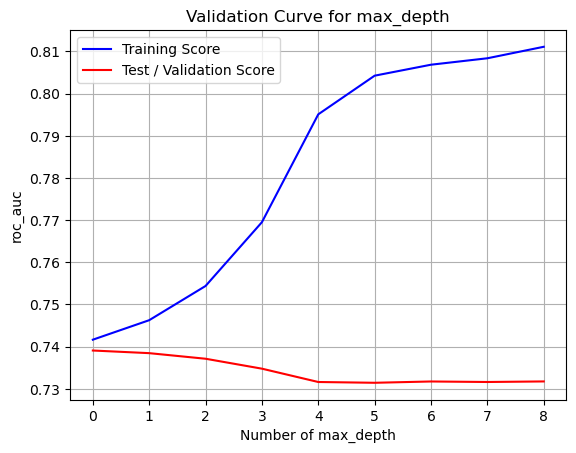

In [92]:
# 7. Analyzing model complexity with Learning Curves
from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(model_tuned,
                                           X, y,
                                           cv=2,
                                           param_name="max_depth",
                                           param_range=range(1, 10),
                                           scoring="roc_auc")

mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)
print("Train Score Mean-->", mean_train_score)
print("Test Score Mean-->", mean_test_score)

plt.plot(mean_train_score,
         label="Training Score", color="blue")

plt.plot(mean_test_score,
         label="Test / Validation Score", color="red")

plt.title("Validation Curve for max_depth")
plt.xlabel("Number of max_depth")
plt.ylabel("roc_auc")
plt.grid()
plt.legend(loc="best")
plt.show()